# In this notebook we will examine the different covariates present in the STRAVA dataset

In [1]:
# import standard libraries
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib.colors import LinearSegmentedColormap

## Load Data

In [2]:
df = pd.read_parquet("data/strava/berlin_data.parquet")

# Load feature definitions
with open('data/strava/berlin_features_list.json', 'r') as f:
    features = json.load(f)

print(f"Data loaded successfully")
print(f"  Shape: {df.shape[0]:,} rows x {df.shape[1]} columns")

Data loaded successfully
  Shape: 9,053,308 rows x 137 columns


In [3]:
df.head()

,counter_name,date,count,year,latitude,longitude,geometry,socioeconomic_total_population,socioeconomic_share_residents_5plus_years_same_address,socioeconomic_net_migration_per_100,...,connectivity_closeness,connectivity_pagerank,connectivity_clustering,connectivity_is_cycling_main_network,connectivity_is_cycling_minor_network,day_of_week,month,is_weekend,is_count_missing,is_shortterm
0,streetsegment_3572,2019-01-01,93.0,year_is_2019,52.529021,13.154621,POINT (13.154621225529942 52.52902107109385),7250.0,67.1,2.2,...,0.032436,0.000178,0.333333,False,True,Tuesday,month_is_1,False,False,False
1,streetsegment_3572,2019-01-02,123.0,year_is_2019,52.529021,13.154621,POINT (13.154621225529942 52.52902107109385),7250.0,67.1,2.2,...,0.032436,0.000178,0.333333,False,True,Wednesday,month_is_1,False,False,False
2,streetsegment_3572,2019-01-03,151.0,year_is_2019,52.529021,13.154621,POINT (13.154621225529942 52.52902107109385),7250.0,67.1,2.2,...,0.032436,0.000178,0.333333,False,True,Thursday,month_is_1,False,False,False
3,streetsegment_3572,2019-01-04,149.0,year_is_2019,52.529021,13.154621,POINT (13.154621225529942 52.52902107109385),7250.0,67.1,2.2,...,0.032436,0.000178,0.333333,False,True,Friday,month_is_1,False,False,False
4,streetsegment_3572,2019-01-05,146.0,year_is_2019,52.529021,13.154621,POINT (13.154621225529942 52.52902107109385),7250.0,67.1,2.2,...,0.032436,0.000178,0.333333,False,True,Saturday,month_is_1,True,False,False


In [5]:
# display all columns of the dataframe
pd.set_option('display.max_columns', None)
df.head()

,counter_name,date,count,year,latitude,longitude,geometry,socioeconomic_total_population,socioeconomic_share_residents_5plus_years_same_address,socioeconomic_net_migration_per_100,socioeconomic_migration_volume_per_100,socioeconomic_share_under_18,socioeconomic_share_65_and_older,socioeconomic_youth_dependency_ratio,socioeconomic_old_age_dependency_ratio,socioeconomic_average_age,socioeconomic_greying_index,socioeconomic_share_with_migration_background,socioeconomic_share_foreign_nationals,socioeconomic_share_foreign_eu_nationals,socioeconomic_share_foreign_non_eu_nationals,socioeconomic_gender_distribution,socioeconomic_total_fertility_rate,socioeconomic_unemployment_rate_age_15_to_65,infrastructure_count_education_within0.05km,infrastructure_count_hospitals_within0.05km,infrastructure_count_shops_within0.05km,infrastructure_count_industry_within0.05km,infrastructure_count_hotels_within0.05km,infrastructure_count_education_within0.1km,infrastructure_count_hospitals_within0.1km,infrastructure_count_shops_within0.1km,infrastructure_count_industry_within0.1km,infrastructure_count_hotels_within0.1km,infrastructure_count_education_within0.25km,infrastructure_count_hospitals_within0.25km,infrastructure_count_shops_within0.25km,infrastructure_count_industry_within0.25km,infrastructure_count_hotels_within0.25km,infrastructure_count_education_within0.5km,infrastructure_count_hospitals_within0.5km,infrastructure_count_shops_within0.5km,infrastructure_count_industry_within0.5km,infrastructure_count_hotels_within0.5km,infrastructure_bicyclelane_type,infrastructure_distance_citycenter_km,infrastructure_distance_citycenter_km_round,infrastructure_type_of_street,infrastructure_number_of_street_lanes,infrastructure_street_smoothness,infrastructure_street_surface,infrastructure_max_speed,infrastructure_street_name,infrastructure_cyclability,infrastructure_cyclability_commute,infrastructure_cyclability_touring,infrastructure_groesse,infrastructure_sum_fla_percent,infrastructure_str_flges_percent,infrastructure_arable_land_percent,infrastructure_horticulture_percent,infrastructure_baustelle_percent,infrastructure_brach1_percent,infrastructure_brach2_percent,infrastructure_brach3_percent,infrastructure_cemetery_percent,infrastructure_public_facilities_percent,infrastructure_water_bodies_percent,infrastructure_commercial_area_percent,infrastructure_grassland_percent,infrastructure_kerngebiet_percent,infrastructure_allotment_gardens_percent,infrastructure_misch_percent,infrastructure_park_area_percent,infrastructure_city_square_percent,infrastructure_waste_disposal_percent,infrastructure_traffic_area_percent,infrastructure_forest_area_percent,infrastructure_weekend_house_area_percent,infrastructure_residential_use_percent,infrastructure_flaeche_gross_percent,infrastructure_is_within_cyclingroute,weather_temp_avg,weather_temp_min,weather_temp_max,weather_precipitation,weather_snowfall,weather_wind_speed_avg,weather_wind_speed_gust,weather_pressure,weather_sunshine_duration,strava_activity_type,strava_total_trip_count,strava_ride_count,strava_ebike_ride_count,strava_total_people_count,strava_total_commute_trip_count,strava_total_leisure_trip_count,strava_total_morning_trip_count,strava_total_midday_trip_count,strava_total_evening_trip_count,strava_total_overnight_trip_count,strava_total_male_people_count,strava_total_female_people_count,strava_total_18_34_people_count,strava_total_35_54_people_count,strava_total_55_64_people_count,strava_total_65_plus_people_count,strava_total_average_speed_meters_per_second,strava_total_unspecified_people_count,motorized_vehicle_count_all_vehicles_6km,motorized_vehicle_count_cars_6km,motorized_vehicle_count_trucks_6km,motorized_avg_speed_all_vehicles_6km,motorized_avg_speed_cars_6km,motorized_avg_speed_trucks_6km,motorized_vehicle_count_all_vehicles,motorized_vehicle_count_cars,motorized_vehicle_count_trucks,motorized_avg_speed_all_vehicles,motorized_avg_speed_cars,motorized_avg_speed_trucks,is_publicholiday,is_sch

In [6]:
# number of nan/null values of column 'strava_toal_trip_count'
df['strava_total_trip_count'].isna().sum()

0

In [7]:
# unique values of column 'strava_total_trip_count'
df['strava_total_trip_count'].nunique()

402

## Step 1: Initial Data Quality Assessment

In [ ]:
# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("=" * 80)
print("STRAVA BERLIN DATA - INITIAL QUALITY ASSESSMENT")
print("=" * 80)

# ==============================================================================
# 1. BASIC STRUCTURE
# ==============================================================================

print("\n[1/5] Analyzing data structure...")
print(f"\nDataset dimensions:")
print(f"  Total features: {len(features['numerical']) + len(features['binary']) + len(features['categorical'])}")
print(f"  - Numerical: {len(features['numerical'])}")
print(f"  - Binary: {len(features['binary'])}")
print(f"  - Categorical: {len(features['categorical'])}")
print(f"  - Target: {features['target'][0]}")

# ==============================================================================
# 2. MISSING VALUES ANALYSIS
# ==============================================================================

print("\n[2/5] Checking for missing values...")

missing_stats = pd.DataFrame({
    'Missing_Count': df.isnull().sum(),
    'Missing_Percent': (df.isnull().sum() / len(df) * 100)
}).sort_values('Missing_Percent', ascending=False)

missing_stats = missing_stats[missing_stats['Missing_Count'] > 0]

if len(missing_stats) > 0:
    print(f"\nWARNING: Found {len(missing_stats)} features with missing values:")
    print(missing_stats.head(20))
else:
    print("No missing values found in the dataset")

# Missing values by feature group
print("\nMissing values by feature group:")
feature_groups = {
    'Numerical': features['numerical'],
    'Binary': features['binary'],
    'Categorical': features['categorical']
}

for group_name, feature_list in feature_groups.items():
    available_features = [f for f in feature_list if f in df.columns]
    if available_features:
        missing_pct = (df[available_features].isnull().sum().sum() / 
                      (len(df) * len(available_features)) * 100)
        print(f"  {group_name}: {missing_pct:.2f}% missing")

# ==============================================================================
# 3. TARGET VARIABLE ANALYSIS
# ==============================================================================

print("\n[3/5] Analyzing target variable...")

target = features['target'][0]
if target in df.columns:
    print(f"\nTarget: {target}")
    print(f"  Count: {df[target].count():,}")
    print(f"  Mean: {df[target].mean():.2f}")
    print(f"  Median: {df[target].median():.2f}")
    print(f"  Std: {df[target].std():.2f}")
    print(f"  Min: {df[target].min():.2f}")
    print(f"  Max: {df[target].max():.2f}")
    print(f"  Zeros: {(df[target] == 0).sum():,} ({(df[target] == 0).sum()/len(df)*100:.1f}%)")
    print(f"  Skewness: {df[target].skew():.2f}")
    print(f"  Kurtosis: {df[target].kurtosis():.2f}")
else:
    print(f"WARNING: Target variable '{target}' not found in dataset")

# ==============================================================================
# 4. DATA TYPE VERIFICATION
# ==============================================================================

print("\n[4/5] Verifying data types...")

# Check numerical features
numerical_features = [f for f in features['numerical'] if f in df.columns]
non_numeric = [f for f in numerical_features if not pd.api.types.is_numeric_dtype(df[f])]
if non_numeric:
    print(f"WARNING: {len(non_numeric)} numerical features have non-numeric types:")
    for f in non_numeric[:10]:
        print(f"  - {f}: {df[f].dtype}")
else:
    print(f"All {len(numerical_features)} numerical features have numeric types")

# Check binary features
binary_features = [f for f in features['binary'] if f in df.columns]
print(f"\nBinary features: {len(binary_features)}")
for f in binary_features[:5]:  # Show first 5 as examples
    unique_vals = df[f].unique()
    print(f"  {f}: {unique_vals} (n_unique={len(unique_vals)})")

# Check categorical features
categorical_features = [f for f in features['categorical'] if f in df.columns]
print(f"\nCategorical features: {len(categorical_features)}")
print("\nCardinality of categorical features:")
for f in categorical_features:
    n_unique = df[f].nunique()
    print(f"  {f}: {n_unique} unique values")

# ==============================================================================
# 5. BASIC STATISTICS BY FEATURE GROUP
# ==============================================================================

print("\n[5/5] Computing summary statistics...")

# Socioeconomic features
socio_features = [f for f in numerical_features if f.startswith('socioeconomic_')]
print(f"\nSocioeconomic features: {len(socio_features)}")
if socio_features:
    print(df[socio_features].describe().T[['mean', 'std', 'min', 'max']])

# Infrastructure features
infra_features = [f for f in numerical_features if f.startswith('infrastructure_')]
print(f"\nInfrastructure features: {len(infra_features)}")
print("(Showing first 10 for brevity)")
if infra_features:
    print(df[infra_features[:10]].describe().T[['mean', 'std', 'min', 'max']])

# Weather features
weather_features = [f for f in numerical_features if f.startswith('weather_')]
print(f"\nWeather features: {len(weather_features)}")
if weather_features:
    print(df[weather_features].describe().T[['mean', 'std', 'min', 'max']])

# Strava features (excluding target)
strava_features = [f for f in numerical_features if f.startswith('strava_') and f != target]
print(f"\nStrava features: {len(strava_features)}")
if strava_features:
    print(df[strava_features].describe().T[['mean', 'std', 'min', 'max']])

# Connectivity features
connectivity_features = [f for f in numerical_features if f.startswith('connectivity_')]
print(f"\nConnectivity features: {len(connectivity_features)}")
if connectivity_features:
    print(df[connectivity_features].describe().T[['mean', 'std', 'min', 'max']])

print("\n" + "=" * 80)
print("INITIAL ASSESSMENT COMPLETE")
print("=" * 80)

STRAVA BERLIN DATA - INITIAL QUALITY ASSESSMENT

[1/5] Analyzing data structure...

Dataset dimensions:
  Total features: 134
  - Numerical: 102
  - Binary: 16
  - Categorical: 16
  - Target: strava_total_trip_count

[2/5] Checking for missing values...

       Missing_Count  Missing_Percent
count        9024480           99.682

Missing values by feature group:

       Missing_Count  Missing_Percent
count        9024480           99.682

Missing values by feature group:
  Numerical: 0.98% missing
  Numerical: 0.98% missing
  Binary: 0.00% missing
  Binary: 0.00% missing
  Categorical: 0.00% missing

[3/5] Analyzing target variable...

Target: strava_total_trip_count
  Count: 9,053,308
  Mean: 13.91
  Median: 5.00
  Categorical: 0.00% missing

[3/5] Analyzing target variable...

Target: strava_total_trip_count
  Count: 9,053,308
  Mean: 13.91
  Median: 5.00
  Std: 32.28
  Min: 0.00
  Max: 4370.00
  Zeros: 4,264,268 (47.1%)
  Skewness: 15.93
  Kurtosis: 891.80

[4/5] Verifying data type

## Step 2: Univariate Analysis and Distributions

The cell afterwords is commented out due to kernel crashes. You can find a smaller variant below.

In [ ]:

# # Set plotting style
# sns.set_style("whitegrid")
# plt.rcParams['figure.figsize'] = (15, 10)

# print("=" * 80)
# print("STRAVA BERLIN DATA - UNIVARIATE ANALYSIS")
# print("=" * 80)

# target = features['target'][0]
# numerical_features = [f for f in features['numerical'] if f in df.columns]

# # ==============================================================================
# # 1. TARGET VARIABLE DISTRIBUTION
# # ==============================================================================

# print("\n[1/5] Analyzing target variable distribution...")

# fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# # Histogram
# axes[0, 0].hist(df[target], bins=50, edgecolor='black', alpha=0.7)
# axes[0, 0].set_title(f'Distribution of {target}', fontsize=12, fontweight='bold')
# axes[0, 0].set_xlabel(target)
# axes[0, 0].set_ylabel('Frequency')
# axes[0, 0].axvline(df[target].mean(), color='red', linestyle='--', label=f'Mean: {df[target].mean():.2f}')
# axes[0, 0].axvline(df[target].median(), color='green', linestyle='--', label=f'Median: {df[target].median():.2f}')
# axes[0, 0].legend()

# # Log-transformed histogram (if contains zeros, add 1)
# log_target = np.log1p(df[target])
# axes[0, 1].hist(log_target, bins=50, edgecolor='black', alpha=0.7, color='orange')
# axes[0, 1].set_title(f'Log-transformed {target}', fontsize=12, fontweight='bold')
# axes[0, 1].set_xlabel(f'log({target} + 1)')
# axes[0, 1].set_ylabel('Frequency')

# # Box plot
# axes[1, 0].boxplot(df[target], vert=True)
# axes[1, 0].set_title(f'Box Plot of {target}', fontsize=12, fontweight='bold')
# axes[1, 0].set_ylabel(target)

# # Q-Q plot
# stats.probplot(df[target], dist="norm", plot=axes[1, 1])
# axes[1, 1].set_title(f'Q-Q Plot of {target}', fontsize=12, fontweight='bold')

# plt.tight_layout()
# plt.show()

# print(f"\nTarget variable statistics:")
# print(f"  Mean: {df[target].mean():.2f}")
# print(f"  Median: {df[target].median():.2f}")
# print(f"  Std: {df[target].std():.2f}")
# print(f"  Skewness: {df[target].skew():.2f}")
# print(f"  Kurtosis: {df[target].kurtosis():.2f}")
# print(f"  Min: {df[target].min():.2f}")
# print(f"  Max: {df[target].max():.2f}")
# print(f"  Zero count: {(df[target] == 0).sum()} ({(df[target] == 0).sum()/len(df)*100:.1f}%)")

# # ==============================================================================
# # 2. WEATHER FEATURES DISTRIBUTION
# # ==============================================================================

# print("\n[2/5] Analyzing weather features...")

# weather_features = [f for f in numerical_features if f.startswith('weather_')]

# if weather_features:
#     n_features = len(weather_features)
#     n_cols = 3
#     n_rows = (n_features + n_cols - 1) // n_cols
    
#     fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
#     axes = axes.flatten() if n_features > 1 else [axes]
    
#     for idx, feature in enumerate(weather_features):
#         axes[idx].hist(df[feature].dropna(), bins=30, edgecolor='black', alpha=0.7, color='skyblue')
#         axes[idx].set_title(feature.replace('weather_', ''), fontsize=10, fontweight='bold')
#         axes[idx].set_xlabel('Value')
#         axes[idx].set_ylabel('Frequency')
        
#         # Add statistics
#         mean_val = df[feature].mean()
#         median_val = df[feature].median()
#         axes[idx].axvline(mean_val, color='red', linestyle='--', alpha=0.7, linewidth=1)
#         axes[idx].axvline(median_val, color='green', linestyle='--', alpha=0.7, linewidth=1)
    
#     # Hide unused subplots
#     for idx in range(n_features, len(axes)):
#         axes[idx].axis('off')
    
#     plt.tight_layout()
#     plt.show()
    
#     print("\nWeather features summary:")
#     print(df[weather_features].describe().T[['mean', 'std', 'min', '25%', '50%', '75%', 'max']])

# # ==============================================================================
# # 3. SOCIOECONOMIC FEATURES DISTRIBUTION
# # ==============================================================================

# print("\n[3/5] Analyzing socioeconomic features...")

# socio_features = [f for f in numerical_features if f.startswith('socioeconomic_')]

# if socio_features:
#     # Select key socioeconomic features for visualization
#     key_socio = [
#         'socioeconomic_total_population',
#         'socioeconomic_average_age',
#         'socioeconomic_share_under_18',
#         'socioeconomic_share_65_and_older',
#         'socioeconomic_unemployment_rate_age_15_to_65',
#         'socioeconomic_share_with_migration_background'
#     ]
#     key_socio = [f for f in key_socio if f in socio_features]
    
#     n_features = len(key_socio)
#     n_cols = 3
#     n_rows = (n_features + n_cols - 1) // n_cols
    
#     fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
#     axes = axes.flatten() if n_features > 1 else [axes]
    
#     for idx, feature in enumerate(key_socio):
#         axes[idx].hist(df[feature].dropna(), bins=30, edgecolor='black', alpha=0.7, color='lightcoral')
#         axes[idx].set_title(feature.replace('socioeconomic_', ''), fontsize=10, fontweight='bold')
#         axes[idx].set_xlabel('Value')
#         axes[idx].set_ylabel('Frequency')
        
#         mean_val = df[feature].mean()
#         axes[idx].axvline(mean_val, color='red', linestyle='--', alpha=0.7, linewidth=2)
    
#     # Hide unused subplots
#     for idx in range(n_features, len(axes)):
#         axes[idx].axis('off')
    
#     plt.tight_layout()
#     plt.show()
    
#     print("\nKey socioeconomic features summary:")
#     print(df[key_socio].describe().T[['mean', 'std', 'min', '50%', 'max']])

# # ==============================================================================
# # 4. INFRASTRUCTURE PROXIMITY FEATURES
# # ==============================================================================

# print("\n[4/5] Analyzing infrastructure proximity features...")

# # Education proximity at different radii
# education_features = [f for f in numerical_features if 'education' in f and 'count' in f]
# shops_features = [f for f in numerical_features if 'shops' in f and 'count' in f]

# if education_features or shops_features:
#     fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
#     if education_features:
#         for feature in education_features:
#             radius = feature.split('within')[1].replace('km', '')
#             axes[0].hist(df[feature].dropna(), bins=20, alpha=0.5, label=f'{radius}', edgecolor='black')
#         axes[0].set_title('Education Facilities Count by Radius', fontsize=12, fontweight='bold')
#         axes[0].set_xlabel('Count')
#         axes[0].set_ylabel('Frequency')
#         axes[0].legend()
    
#     if shops_features:
#         for feature in shops_features:
#             radius = feature.split('within')[1].replace('km', '')
#             axes[1].hist(df[feature].dropna(), bins=20, alpha=0.5, label=f'{radius}', edgecolor='black')
#         axes[1].set_title('Shops Count by Radius', fontsize=12, fontweight='bold')
#         axes[1].set_xlabel('Count')
#         axes[1].set_ylabel('Frequency')
#         axes[1].legend()
    
#     plt.tight_layout()
#     plt.show()

# # ==============================================================================
# # 5. STRAVA ACTIVITY BREAKDOWN
# # ==============================================================================

# print("\n[5/5] Analyzing Strava activity patterns...")

# strava_features = [f for f in numerical_features if f.startswith('strava_') and f != target]

# # Trip type breakdown
# trip_types = [
#     'strava_total_commute_trip_count',
#     'strava_total_leisure_trip_count'
# ]
# trip_types = [f for f in trip_types if f in strava_features]

# # Time of day breakdown
# time_features = [
#     'strava_total_morning_trip_count',
#     'strava_total_midday_trip_count',
#     'strava_total_evening_trip_count',
#     'strava_total_overnight_trip_count'
# ]
# time_features = [f for f in time_features if f in strava_features]

# # Age group breakdown
# age_features = [
#     'strava_total_18_34_people_count',
#     'strava_total_35_54_people_count',
#     'strava_total_55_64_people_count',
#     'strava_total_65_plus_people_count'
# ]
# age_features = [f for f in age_features if f in strava_features]

# fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# # Trip types
# if trip_types:
#     trip_sums = [df[f].sum() for f in trip_types]
#     labels = [f.replace('strava_total_', '').replace('_trip_count', '') for f in trip_types]
#     axes[0, 0].pie(trip_sums, labels=labels, autopct='%1.1f%%', startangle=90)
#     axes[0, 0].set_title('Trip Type Distribution', fontsize=12, fontweight='bold')

# # Time of day
# if time_features:
#     time_sums = [df[f].sum() for f in time_features]
#     labels = [f.replace('strava_total_', '').replace('_trip_count', '') for f in time_features]
#     axes[0, 1].pie(time_sums, labels=labels, autopct='%1.1f%%', startangle=90)
#     axes[0, 1].set_title('Time of Day Distribution', fontsize=12, fontweight='bold')

# # Age groups
# if age_features:
#     age_sums = [df[f].sum() for f in age_features]
#     labels = [f.replace('strava_total_', '').replace('_people_count', '') for f in age_features]
#     axes[1, 0].pie(age_sums, labels=labels, autopct='%1.1f%%', startangle=90)
#     axes[1, 0].set_title('Age Group Distribution', fontsize=12, fontweight='bold')

# # Gender distribution
# gender_features = ['strava_total_male_people_count', 'strava_total_female_people_count']
# if all(f in strava_features for f in gender_features):
#     gender_sums = [df[f].sum() for f in gender_features]
#     labels = ['Male', 'Female']
#     axes[1, 1].pie(gender_sums, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightpink'])
#     axes[1, 1].set_title('Gender Distribution', fontsize=12, fontweight='bold')

# plt.tight_layout()
# plt.show()

# print("\nStrava activity summary:")
# if trip_types:
#     print("\nTrip types:")
#     for f in trip_types:
#         print(f"  {f.replace('strava_total_', '')}: {df[f].sum():,.0f} total trips")

# if time_features:
#     print("\nTime of day:")
#     for f in time_features:
#         print(f"  {f.replace('strava_total_', '')}: {df[f].sum():,.0f} total trips")

# print("\n" + "=" * 80)
# print("UNIVARIATE ANALYSIS COMPLETE")
# print("=" * 80)


STRAVA BERLIN DATA - UNIVARIATE ANALYSIS

[1/2] Analyzing target variable distribution...


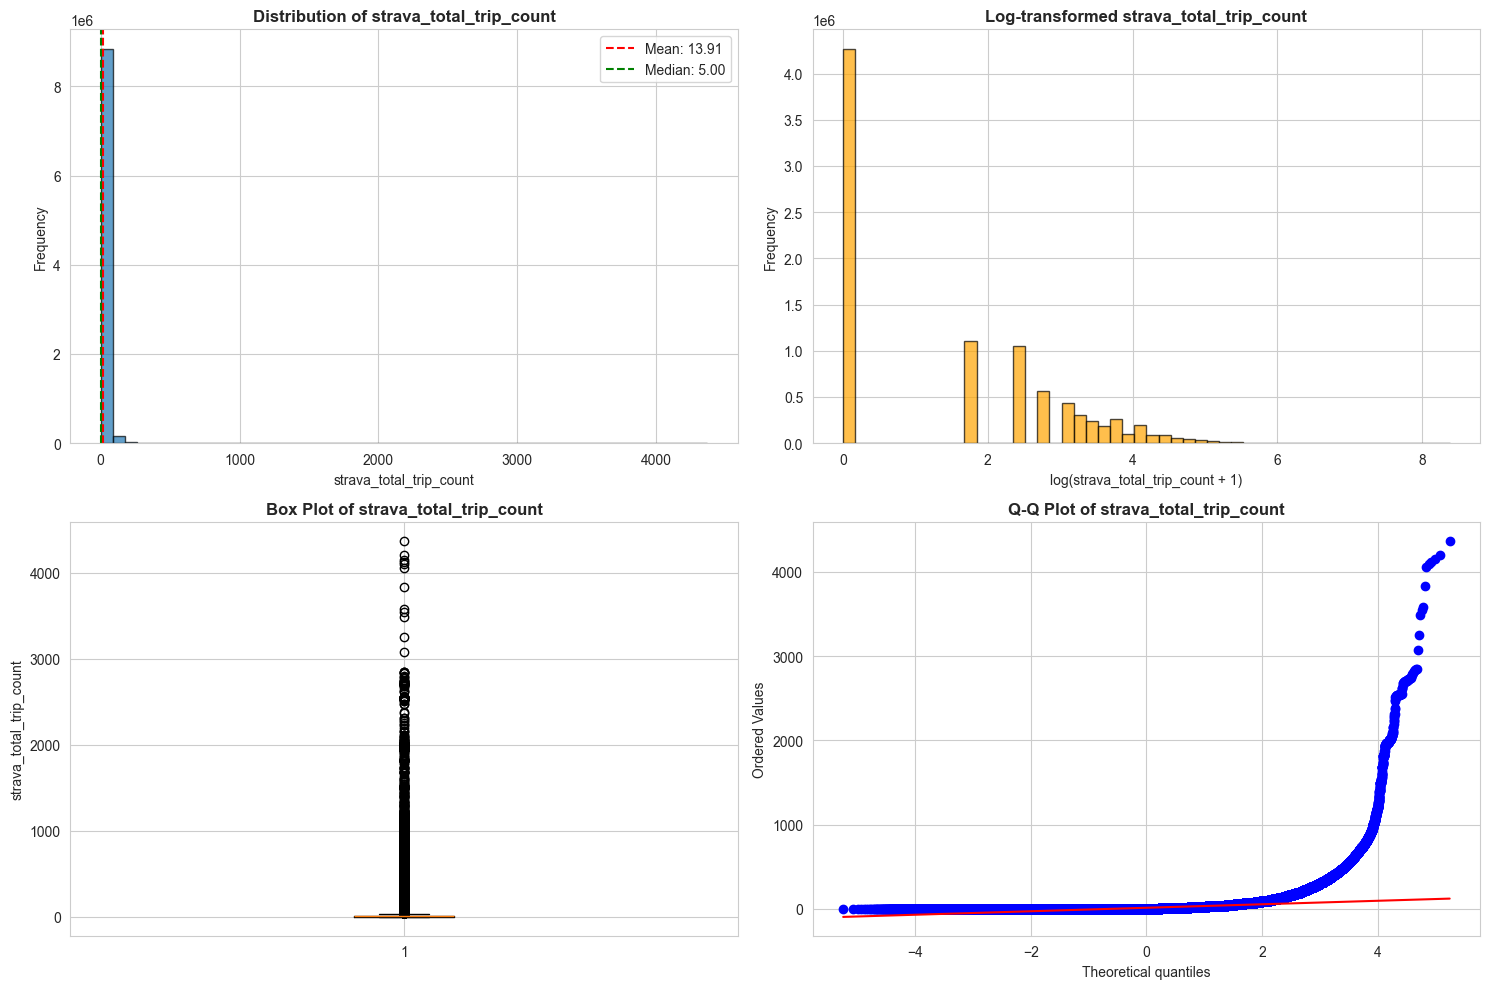


Target variable statistics:
  Mean: 13.91
  Median: 5.00
  Std: 32.28
  Skewness: 15.93
  Kurtosis: 891.80
  Min: 0.00
  Max: 4370.00
  Zero count: 4264268 (47.1%)

[2/2] Analyzing weather features...
  Skewness: 15.93
  Kurtosis: 891.80
  Min: 0.00
  Max: 4370.00
  Zero count: 4264268 (47.1%)

[2/2] Analyzing weather features...


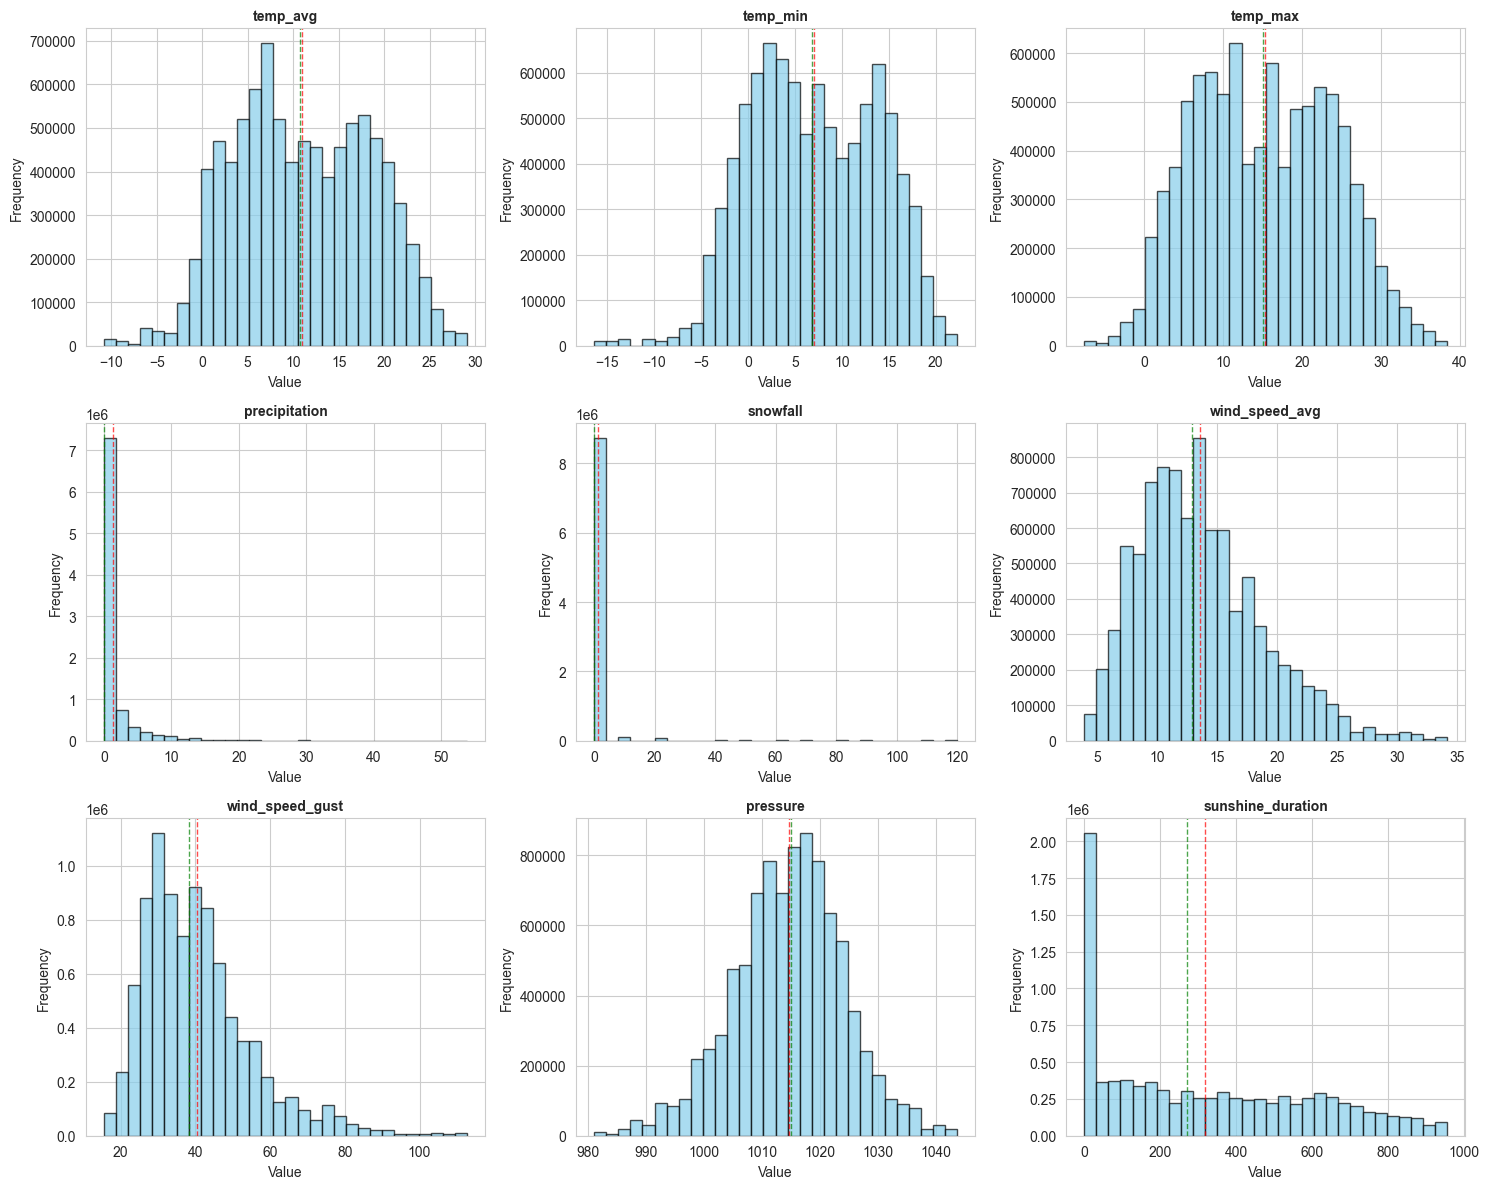


Weather features summary:
                              mean     std     min      25%      50%      75%  \
weather_temp_avg            11.010   7.450 -10.800    5.200   10.700   17.200   
weather_temp_min             7.003   6.660 -16.400    1.800    6.800   12.800   
weather_temp_max            15.255   8.661  -7.600    8.200   15.100   22.200   
weather_precipitation        1.395   3.689   0.000    0.000    0.000    1.100   
weather_snowfall             1.462   9.739   0.000    0.000    0.000    0.000   
weather_wind_speed_avg      13.551   5.115   3.900    9.700   12.900   16.600   
weather_wind_speed_gust     40.494  14.262  15.500   30.200   38.200   47.500   
weather_pressure          1014.642   9.518 981.100 1008.700 1015.100 1020.800   
weather_sunshine_duration  317.775 277.106   0.000   48.000  270.000  546.000   

                               max  
weather_temp_avg            29.100  
weather_temp_min            22.300  
weather_temp_max            38.400  
weather_precip

In [11]:
# Set plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 10)

print("=" * 80)
print("STRAVA BERLIN DATA - UNIVARIATE ANALYSIS")
print("=" * 80)

target = features['target'][0]
numerical_features = [f for f in features['numerical'] if f in df.columns]

# ==================================================================================================
# 1. TARGET VARIABLE DISTRIBUTION
# ==================================================================================================

print("\n[1/2] Analyzing target variable distribution...")

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Histogram
axes[0, 0].hist(df[target], bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].set_title(f'Distribution of {target}', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel(target)
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].axvline(df[target].mean(), color='red', linestyle='--', label=f'Mean: {df[target].mean():.2f}')
axes[0, 0].axvline(df[target].median(), color='green', linestyle='--', label=f'Median: {df[target].median():.2f}')
axes[0, 0].legend()

# Log-transformed histogram (if contains zeros, add 1)
log_target = np.log1p(df[target])
axes[0, 1].hist(log_target, bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[0, 1].set_title(f'Log-transformed {target}', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel(f'log({target} + 1)')
axes[0, 1].set_ylabel('Frequency')

# Box plot
axes[1, 0].boxplot(df[target], vert=True)
axes[1, 0].set_title(f'Box Plot of {target}', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel(target)

# Q-Q plot
stats.probplot(df[target], dist="norm", plot=axes[1, 1])
axes[1, 1].set_title(f'Q-Q Plot of {target}', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nTarget variable statistics:")
print(f"  Mean: {df[target].mean():.2f}")
print(f"  Median: {df[target].median():.2f}")
print(f"  Std: {df[target].std():.2f}")
print(f"  Skewness: {df[target].skew():.2f}")
print(f"  Kurtosis: {df[target].kurtosis():.2f}")
print(f"  Min: {df[target].min():.2f}")
print(f"  Max: {df[target].max():.2f}")
print(f"  Zero count: {(df[target] == 0).sum()} ({(df[target] == 0).sum()/len(df)*100:.1f}%)")

# ==================================================================================================
# 2. WEATHER FEATURES DISTRIBUTION
# ==================================================================================================

print("\n[2/2] Analyzing weather features...")

weather_features = [f for f in numerical_features if f.startswith('weather_')]

if weather_features:
    n_features = len(weather_features)
    n_cols = 3
    n_rows = (n_features + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
    axes = axes.flatten() if n_features > 1 else [axes]
    
    for idx, feature in enumerate(weather_features):
        axes[idx].hist(df[feature].dropna(), bins=30, edgecolor='black', alpha=0.7, color='skyblue')
        axes[idx].set_title(feature.replace('weather_', ''), fontsize=10, fontweight='bold')
        axes[idx].set_xlabel('Value')
        axes[idx].set_ylabel('Frequency')
        
        # Add statistics
        mean_val = df[feature].mean()
        median_val = df[feature].median()
        axes[idx].axvline(mean_val, color='red', linestyle='--', alpha=0.7, linewidth=1)
        axes[idx].axvline(median_val, color='green', linestyle='--', alpha=0.7, linewidth=1)
    
    # Hide unused subplots
    for idx in range(n_features, len(axes)):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    print("\nWeather features summary:")
    print(df[weather_features].describe().T[['mean', 'std', 'min', '25%', '50%', '75%', 'max']])


## Step 3: Bivariate Analysis - Correlations and Relationships

STRAVA BERLIN DATA - BIVARIATE ANALYSIS

[1/5] Computing correlations with target variable...

Top 20 features most correlated with strava_total_trip_count:
strava_ride_count                              0.999
strava_total_people_count                      0.976
strava_total_male_people_count                 0.970
strava_total_35_54_people_count                0.947
strava_total_leisure_trip_count                0.939
strava_total_18_34_people_count                0.930
strava_total_evening_trip_count                0.873
strava_total_female_people_count               0.851
strava_total_midday_trip_count                 0.824
strava_total_morning_trip_count                0.803
strava_total_55_64_people_count                0.690
strava_total_commute_trip_count                0.675
count                                          0.608
strava_total_unspecified_people_count          0.592
strava_total_overnight_trip_count              0.583
strava_total_average_speed_meters_per_second   0

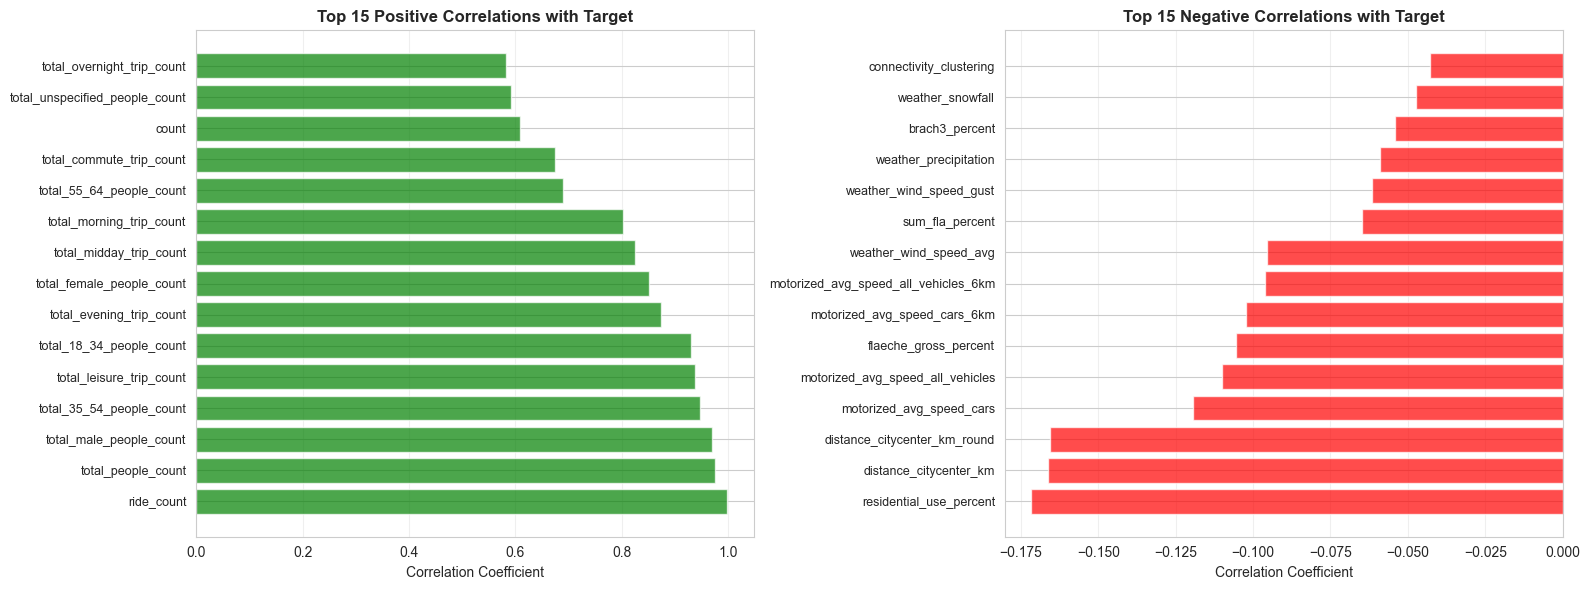


[2/5] Creating correlation matrices by feature group...


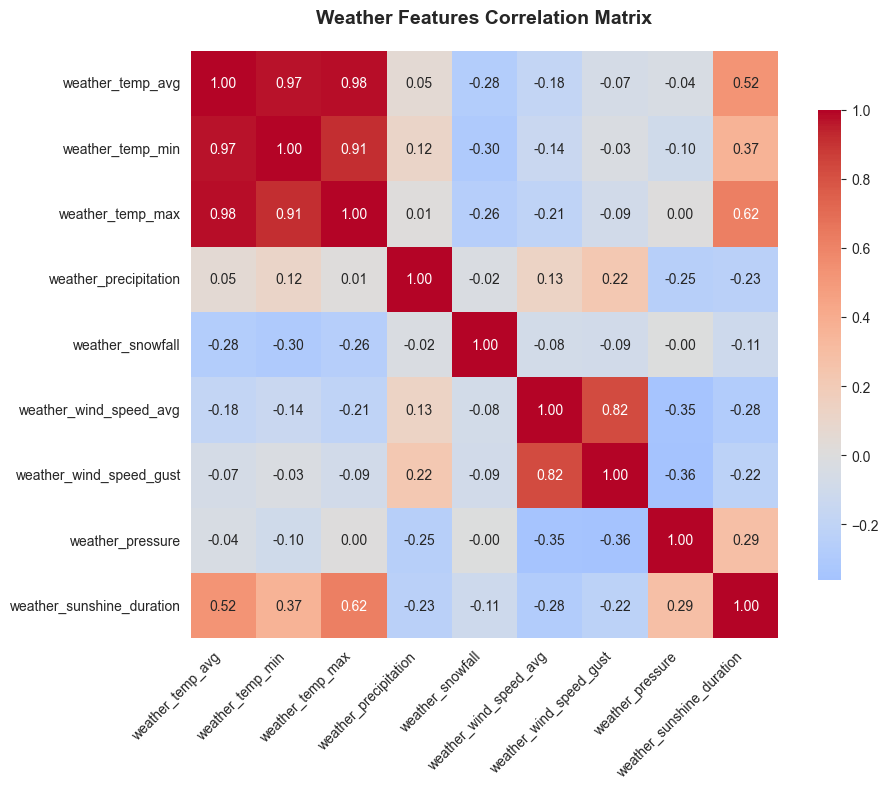

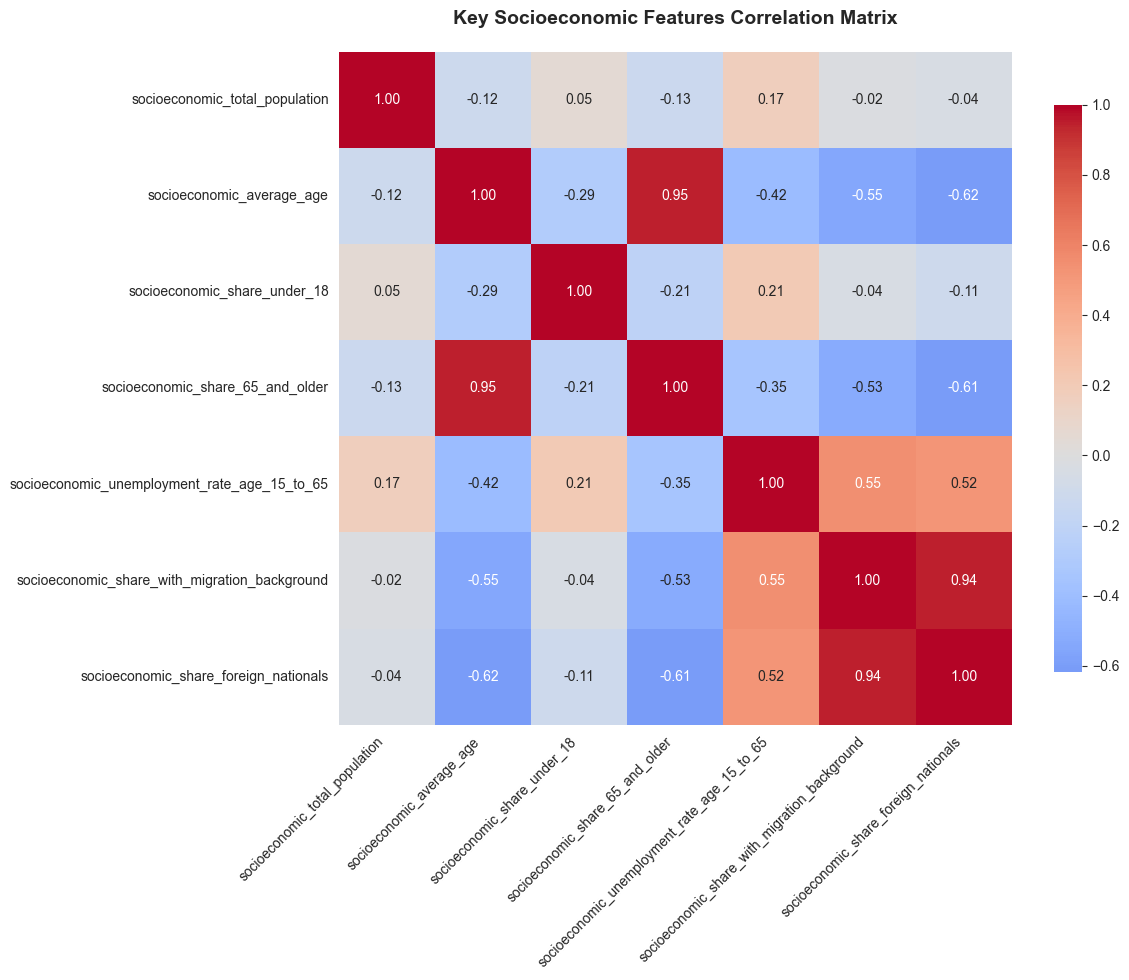

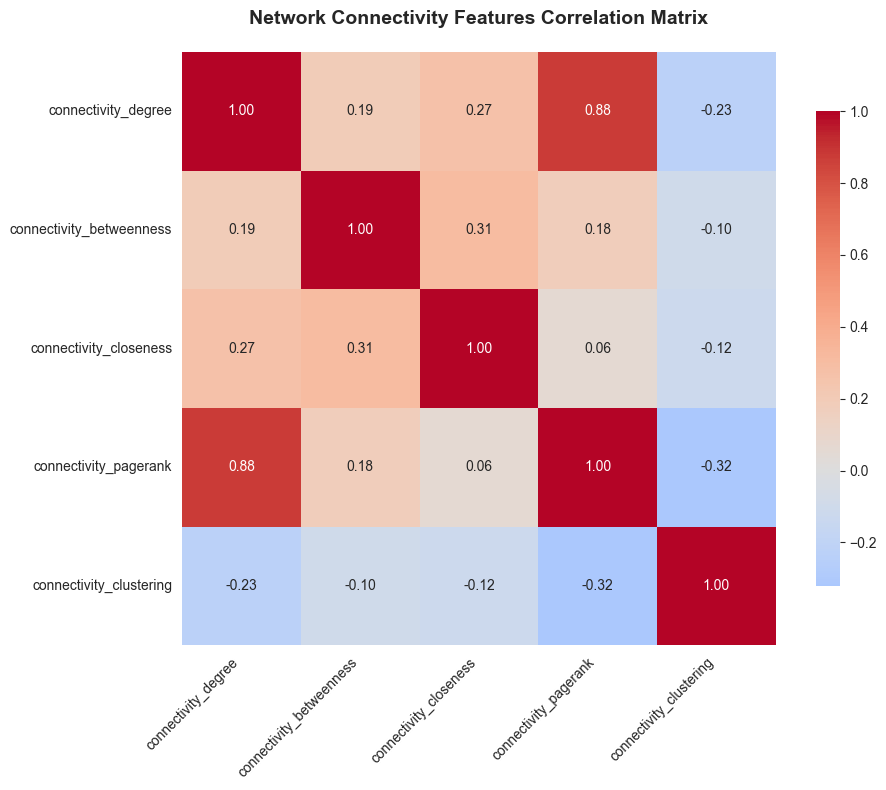


[3/5] Creating scatter plots for top correlated features...


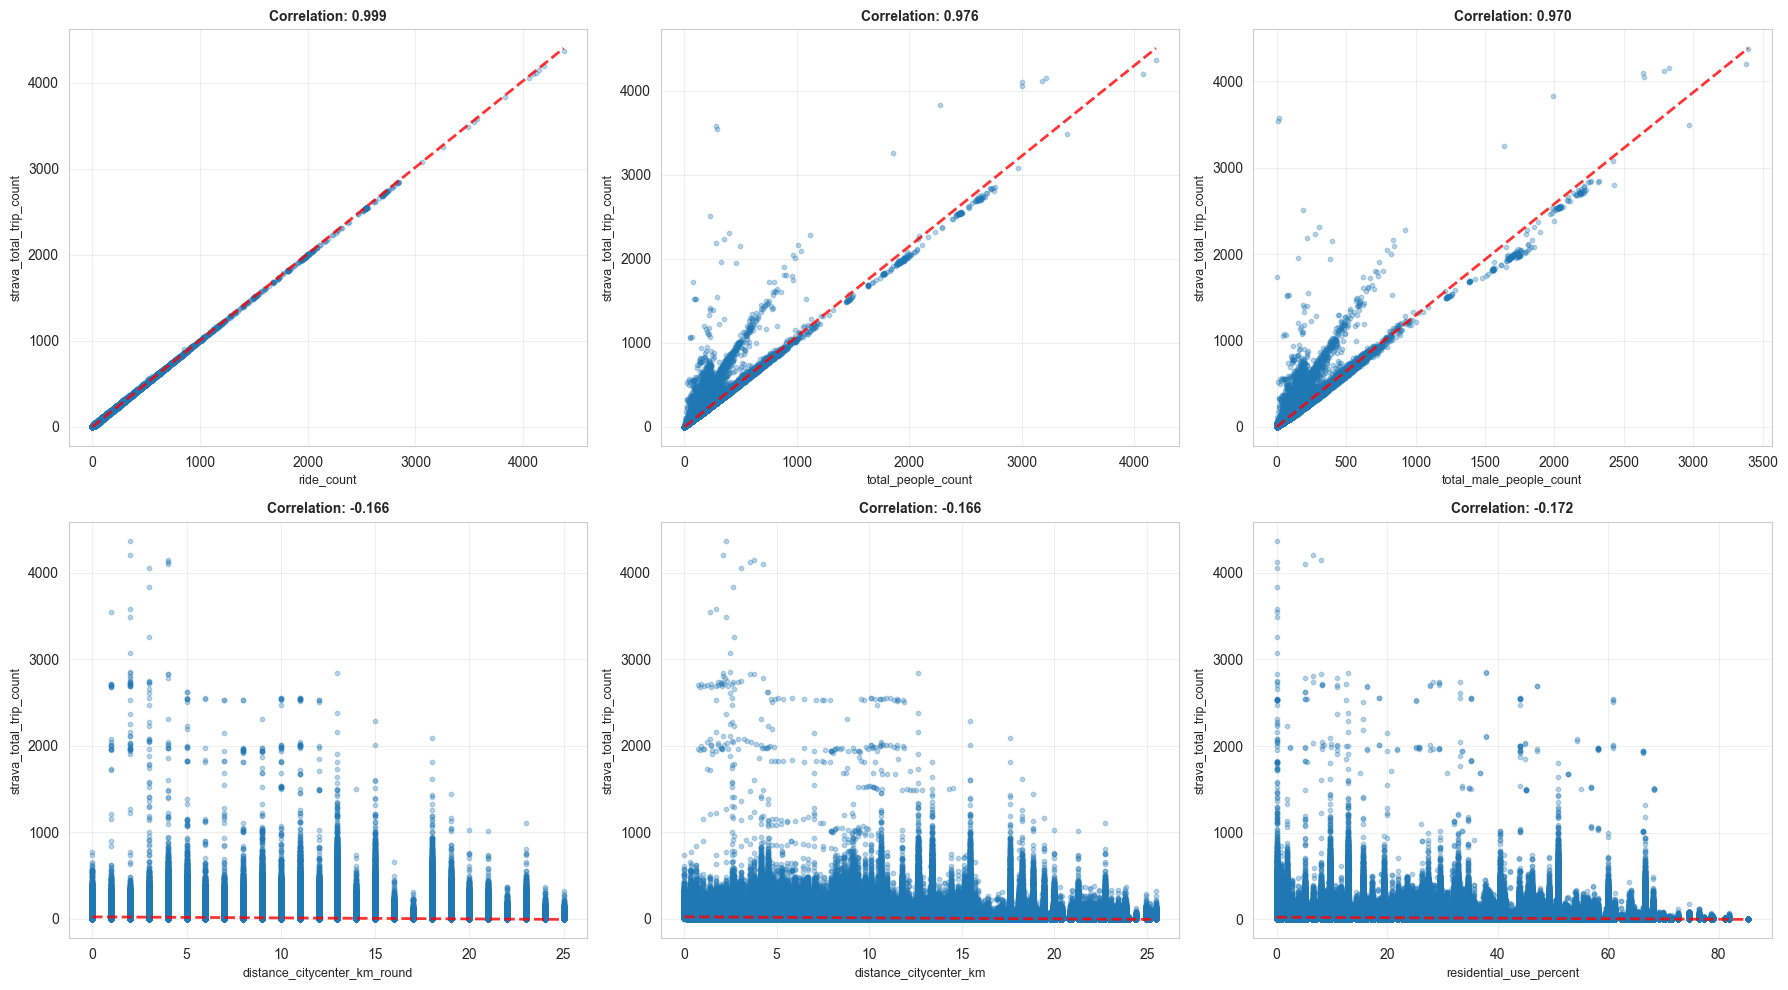


[4/5] Analyzing weather impact on cycling activity...


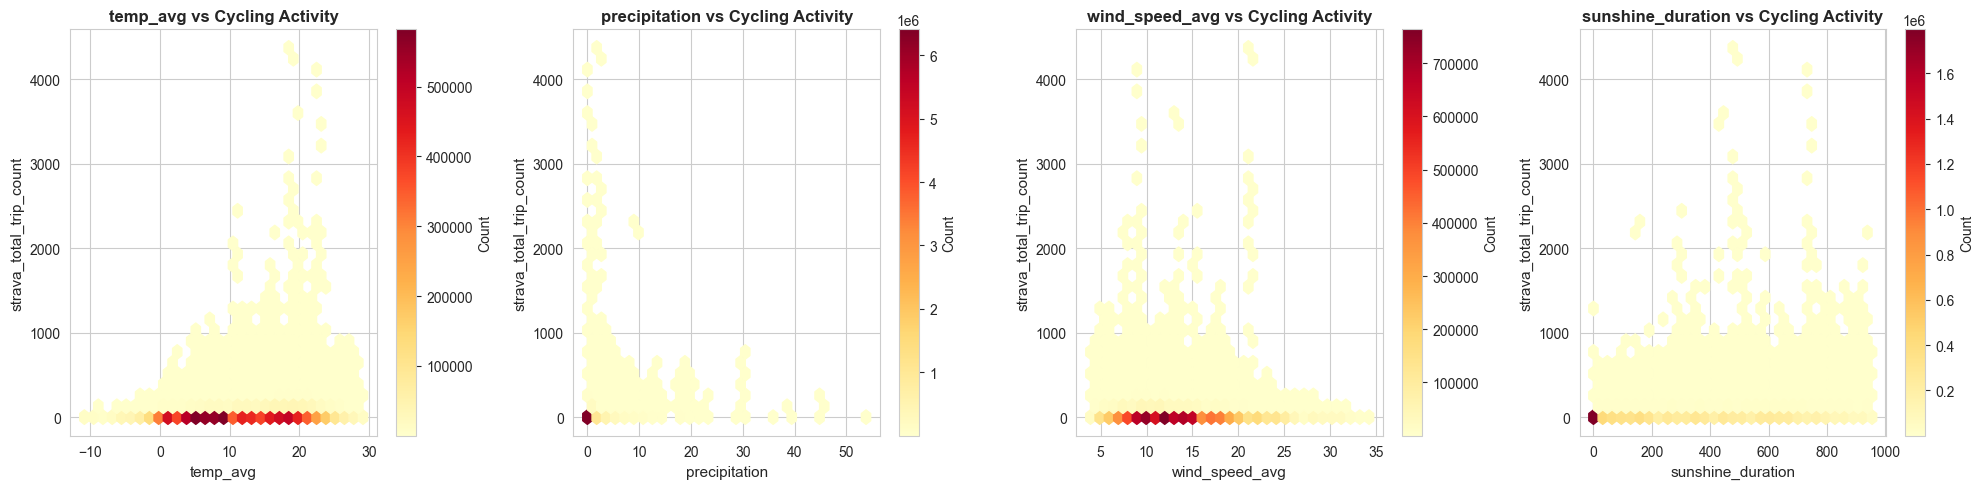


[5/5] Analyzing infrastructure impact on cycling activity...


/var/folders/6v/992p8knd6g5flm6m0p856jlw0000gn/T/ipykernel_40830/3556179041.py:195: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_avg = df.groupby(bins)[target].mean()


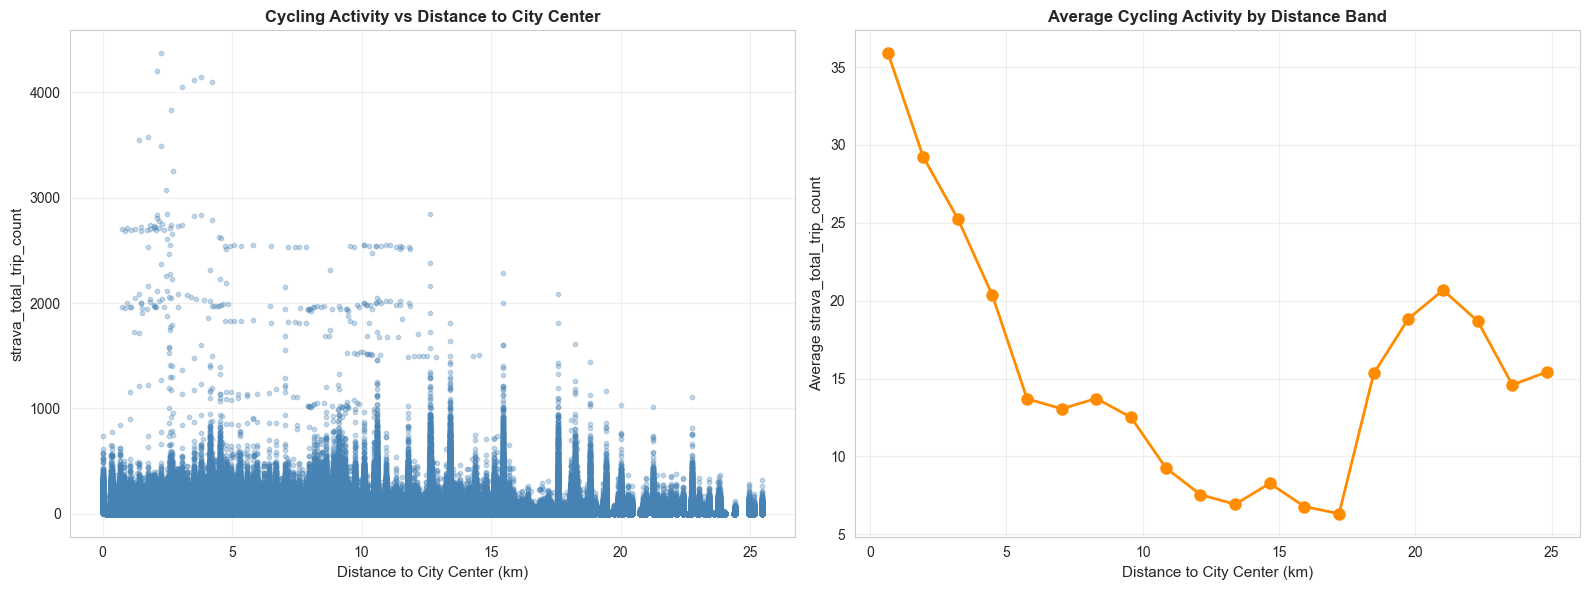

/var/folders/6v/992p8knd6g5flm6m0p856jlw0000gn/T/ipykernel_40830/3556179041.py:225: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_stats = df_temp.groupby('bins')[target].agg(['mean', 'count'])
/var/folders/6v/992p8knd6g5flm6m0p856jlw0000gn/T/ipykernel_40830/3556179041.py:225: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_stats = df_temp.groupby('bins')[target].agg(['mean', 'count'])
/var/folders/6v/992p8knd6g5flm6m0p856jlw0000gn/T/ipykernel_40830/3556179041.py:225: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=

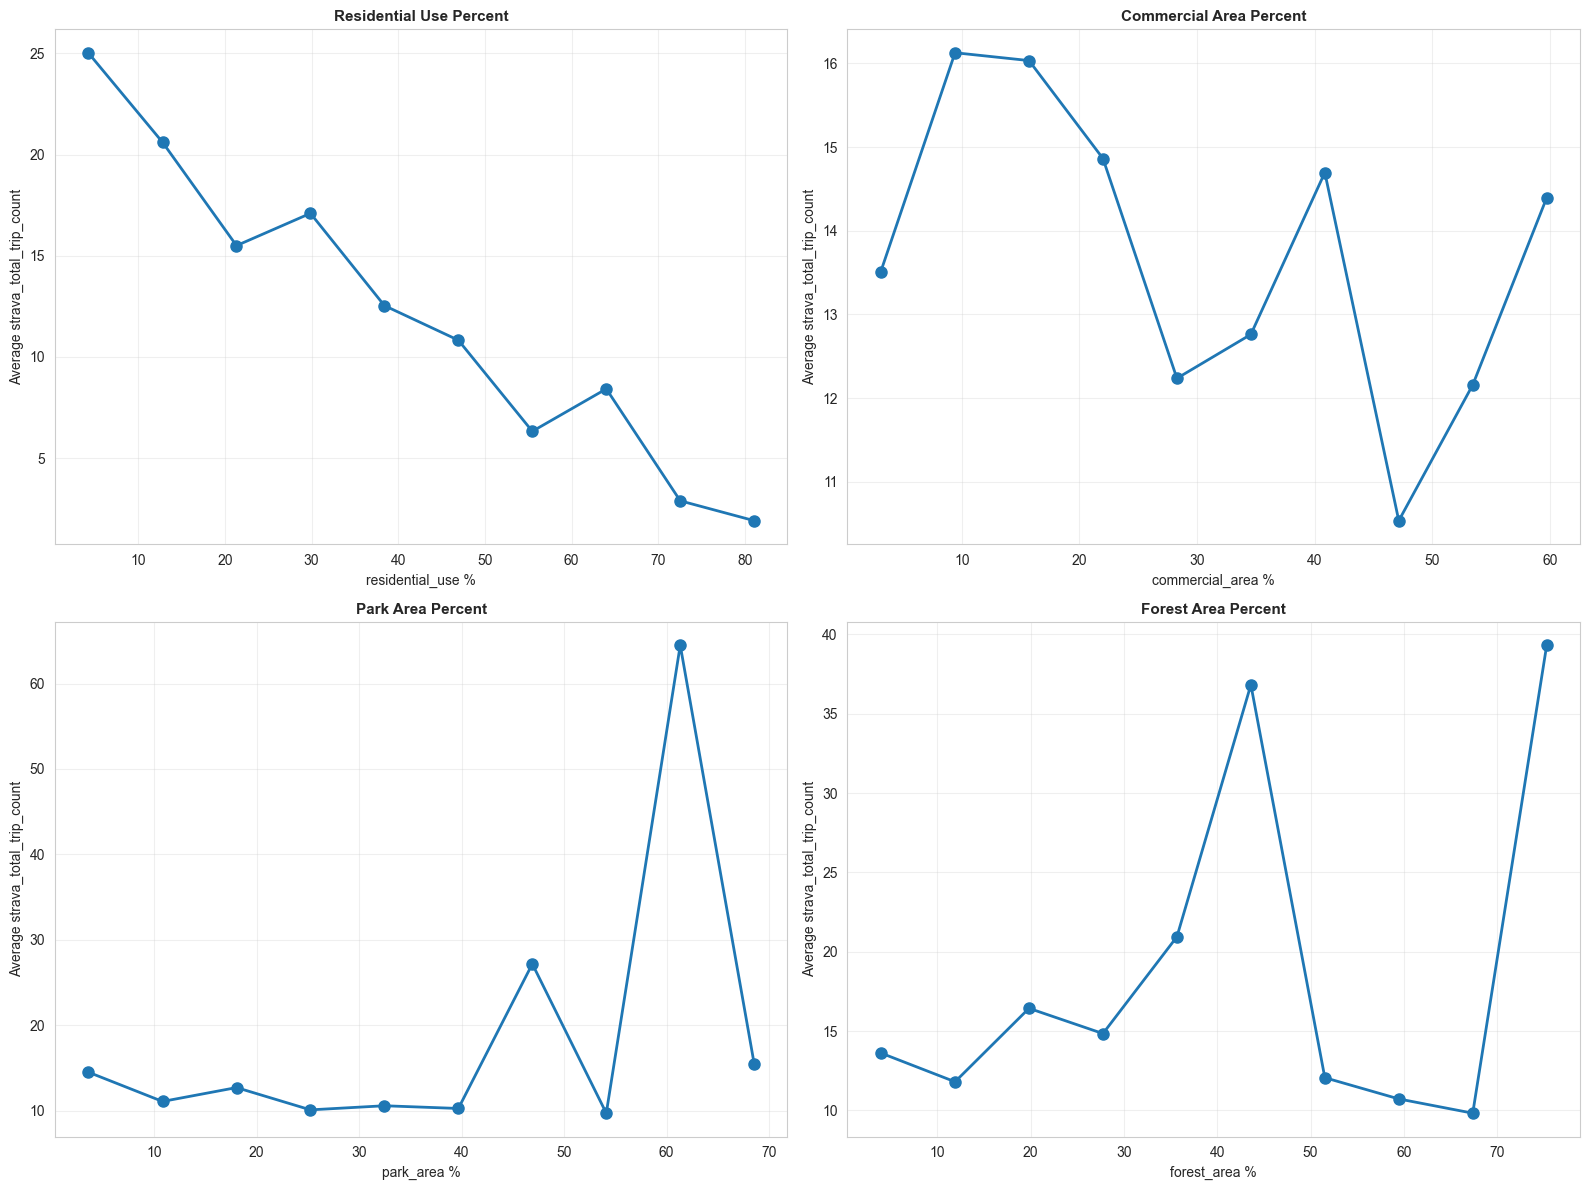


BIVARIATE ANALYSIS COMPLETE


In [12]:
print("=" * 80)
print("STRAVA BERLIN DATA - BIVARIATE ANALYSIS")
print("=" * 80)

# ==============================================================================
# 1. CORRELATION WITH TARGET VARIABLE
# ==============================================================================

print("\n[1/5] Computing correlations with target variable...")

# Get numerical features
numerical_features = [f for f in features['numerical'] if f in df.columns]

# Calculate correlations with target
correlations = df[numerical_features].corrwith(df[target]).sort_values(ascending=False)

# Remove target itself
correlations = correlations[correlations.index != target]

print(f"\nTop 20 features most correlated with {target}:")
print(correlations.head(20))

print(f"\nTop 20 features most negatively correlated with {target}:")
print(correlations.tail(20))

# Visualize top correlations
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Top positive correlations
top_positive = correlations.head(15)
axes[0].barh(range(len(top_positive)), top_positive.values, color='green', alpha=0.7)
axes[0].set_yticks(range(len(top_positive)))
axes[0].set_yticklabels([f.replace('strava_', '').replace('infrastructure_', '').replace('socioeconomic_', '')[:40] 
                          for f in top_positive.index], fontsize=9)
axes[0].set_xlabel('Correlation Coefficient')
axes[0].set_title('Top 15 Positive Correlations with Target', fontsize=12, fontweight='bold')
axes[0].grid(axis='x', alpha=0.3)

# Top negative correlations
top_negative = correlations.tail(15).sort_values()
axes[1].barh(range(len(top_negative)), top_negative.values, color='red', alpha=0.7)
axes[1].set_yticks(range(len(top_negative)))
axes[1].set_yticklabels([f.replace('strava_', '').replace('infrastructure_', '').replace('socioeconomic_', '')[:40] 
                          for f in top_negative.index], fontsize=9)
axes[1].set_xlabel('Correlation Coefficient')
axes[1].set_title('Top 15 Negative Correlations with Target', fontsize=12, fontweight='bold')
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

# ==============================================================================
# 2. CORRELATION MATRICES BY FEATURE GROUP
# ==============================================================================

print("\n[2/5] Creating correlation matrices by feature group...")

# Weather features correlation
weather_features = [f for f in numerical_features if f.startswith('weather_')]
if len(weather_features) > 1:
    fig, ax = plt.subplots(figsize=(10, 8))
    corr_matrix = df[weather_features].corr()
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
                square=True, ax=ax, cbar_kws={'shrink': 0.8})
    ax.set_title('Weather Features Correlation Matrix', fontsize=14, fontweight='bold', pad=20)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

# Socioeconomic features correlation (subset)
socio_features = [f for f in numerical_features if f.startswith('socioeconomic_')]
key_socio = [
    'socioeconomic_total_population',
    'socioeconomic_average_age',
    'socioeconomic_share_under_18',
    'socioeconomic_share_65_and_older',
    'socioeconomic_unemployment_rate_age_15_to_65',
    'socioeconomic_share_with_migration_background',
    'socioeconomic_share_foreign_nationals'
]
key_socio = [f for f in key_socio if f in socio_features]

if len(key_socio) > 1:
    fig, ax = plt.subplots(figsize=(12, 10))
    corr_matrix = df[key_socio].corr()
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
                square=True, ax=ax, cbar_kws={'shrink': 0.8})
    ax.set_title('Key Socioeconomic Features Correlation Matrix', fontsize=14, fontweight='bold', pad=20)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

# Connectivity features correlation
connectivity_features = [f for f in numerical_features if f.startswith('connectivity_')]
if len(connectivity_features) > 1:
    fig, ax = plt.subplots(figsize=(10, 8))
    corr_matrix = df[connectivity_features].corr()
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
                square=True, ax=ax, cbar_kws={'shrink': 0.8})
    ax.set_title('Network Connectivity Features Correlation Matrix', fontsize=14, fontweight='bold', pad=20)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

# ==============================================================================
# 3. SCATTER PLOTS - TOP CORRELATED FEATURES
# ==============================================================================

print("\n[3/5] Creating scatter plots for top correlated features...")

# Select top 6 most correlated features (both positive and negative)
top_features = list(correlations.head(3).index) + list(correlations.tail(3).index)

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, feature in enumerate(top_features):
    ax = axes[idx]
    
    # Create scatter plot with regression line
    ax.scatter(df[feature], df[target], alpha=0.3, s=10)
    
    # Add regression line
    z = np.polyfit(df[feature].dropna(), df[target][df[feature].notna()], 1)
    p = np.poly1d(z)
    x_line = np.linspace(df[feature].min(), df[feature].max(), 100)
    ax.plot(x_line, p(x_line), "r--", linewidth=2, alpha=0.8)
    
    # Labels and title
    corr_val = correlations[feature]
    ax.set_xlabel(feature.replace('strava_', '').replace('infrastructure_', '').replace('socioeconomic_', '')[:50], 
                  fontsize=9)
    ax.set_ylabel(target, fontsize=9)
    ax.set_title(f'Correlation: {corr_val:.3f}', fontsize=10, fontweight='bold')
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# ==============================================================================
# 4. WEATHER VS CYCLING ACTIVITY
# ==============================================================================

print("\n[4/5] Analyzing weather impact on cycling activity...")

weather_features_for_analysis = [
    'weather_temp_avg',
    'weather_precipitation',
    'weather_wind_speed_avg',
    'weather_sunshine_duration'
]
weather_features_for_analysis = [f for f in weather_features_for_analysis if f in weather_features]

if weather_features_for_analysis:
    n_features = len(weather_features_for_analysis)
    fig, axes = plt.subplots(1, n_features, figsize=(5*n_features, 5))
    if n_features == 1:
        axes = [axes]
    
    for idx, feature in enumerate(weather_features_for_analysis):
        ax = axes[idx]
        
        # Hexbin plot for density
        hb = ax.hexbin(df[feature], df[target], gridsize=30, cmap='YlOrRd', mincnt=1)
        ax.set_xlabel(feature.replace('weather_', ''), fontsize=11)
        ax.set_ylabel(target, fontsize=11)
        ax.set_title(f'{feature.replace("weather_", "")} vs Cycling Activity', fontsize=12, fontweight='bold')
        plt.colorbar(hb, ax=ax, label='Count')
    
    plt.tight_layout()
    plt.show()

# ==============================================================================
# 5. INFRASTRUCTURE vs CYCLING ACTIVITY
# ==============================================================================

print("\n[5/5] Analyzing infrastructure impact on cycling activity...")

# Distance to city center
if 'infrastructure_distance_citycenter_km' in numerical_features:
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Scatter plot
    axes[0].scatter(df['infrastructure_distance_citycenter_km'], df[target], alpha=0.3, s=10, color='steelblue')
    axes[0].set_xlabel('Distance to City Center (km)', fontsize=11)
    axes[0].set_ylabel(target, fontsize=11)
    axes[0].set_title('Cycling Activity vs Distance to City Center', fontsize=12, fontweight='bold')
    axes[0].grid(alpha=0.3)
    
    # Binned average
    bins = pd.cut(df['infrastructure_distance_citycenter_km'], bins=20)
    binned_avg = df.groupby(bins)[target].mean()
    bin_centers = [interval.mid for interval in binned_avg.index]
    axes[1].plot(bin_centers, binned_avg.values, marker='o', linewidth=2, markersize=8, color='darkorange')
    axes[1].set_xlabel('Distance to City Center (km)', fontsize=11)
    axes[1].set_ylabel(f'Average {target}', fontsize=11)
    axes[1].set_title('Average Cycling Activity by Distance Band', fontsize=12, fontweight='bold')
    axes[1].grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Land use patterns
land_use_features = [
    'infrastructure_residential_use_percent',
    'infrastructure_commercial_area_percent',
    'infrastructure_park_area_percent',
    'infrastructure_forest_area_percent'
]
land_use_features = [f for f in land_use_features if f in numerical_features]

if land_use_features:
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    axes = axes.flatten()
    
    for idx, feature in enumerate(land_use_features):
        ax = axes[idx]
        
        # Create bins for the feature
        df_temp = df[[feature, target]].copy()
        df_temp['bins'] = pd.cut(df_temp[feature], bins=10)
        binned_stats = df_temp.groupby('bins')[target].agg(['mean', 'count'])
        
        # Only plot bins with sufficient data
        binned_stats = binned_stats[binned_stats['count'] > 10]
        bin_centers = [interval.mid for interval in binned_stats.index]
        
        ax.plot(bin_centers, binned_stats['mean'].values, marker='o', linewidth=2, markersize=8)
        ax.set_xlabel(feature.replace('infrastructure_', '').replace('_percent', ' %'), fontsize=10)
        ax.set_ylabel(f'Average {target}', fontsize=10)
        ax.set_title(feature.replace('infrastructure_', '').replace('_', ' ').title(), fontsize=11, fontweight='bold')
        ax.grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()

print("\n" + "=" * 80)
print("BIVARIATE ANALYSIS COMPLETE")
print("=" * 80)

## Step 4: Temporal Analysis - Time-based Patterns and Trends

STRAVA BERLIN DATA - TEMPORAL ANALYSIS

[1/6] Analyzing yearly trends...

Yearly statistics:
                      sum   mean    count
year                                     
year_is_2019 16168625.000  8.930  1809670
year_is_2020 26729220.000 14.730  1814628
year_is_2021 28049480.000 15.500  1809670
year_is_2022 26769515.000 14.790  1809670
year_is_2023 28248540.000 15.610  1809670

Yearly statistics:
                      sum   mean    count
year                                     
year_is_2019 16168625.000  8.930  1809670
year_is_2020 26729220.000 14.730  1814628
year_is_2021 28049480.000 15.500  1809670
year_is_2022 26769515.000 14.790  1809670
year_is_2023 28248540.000 15.610  1809670


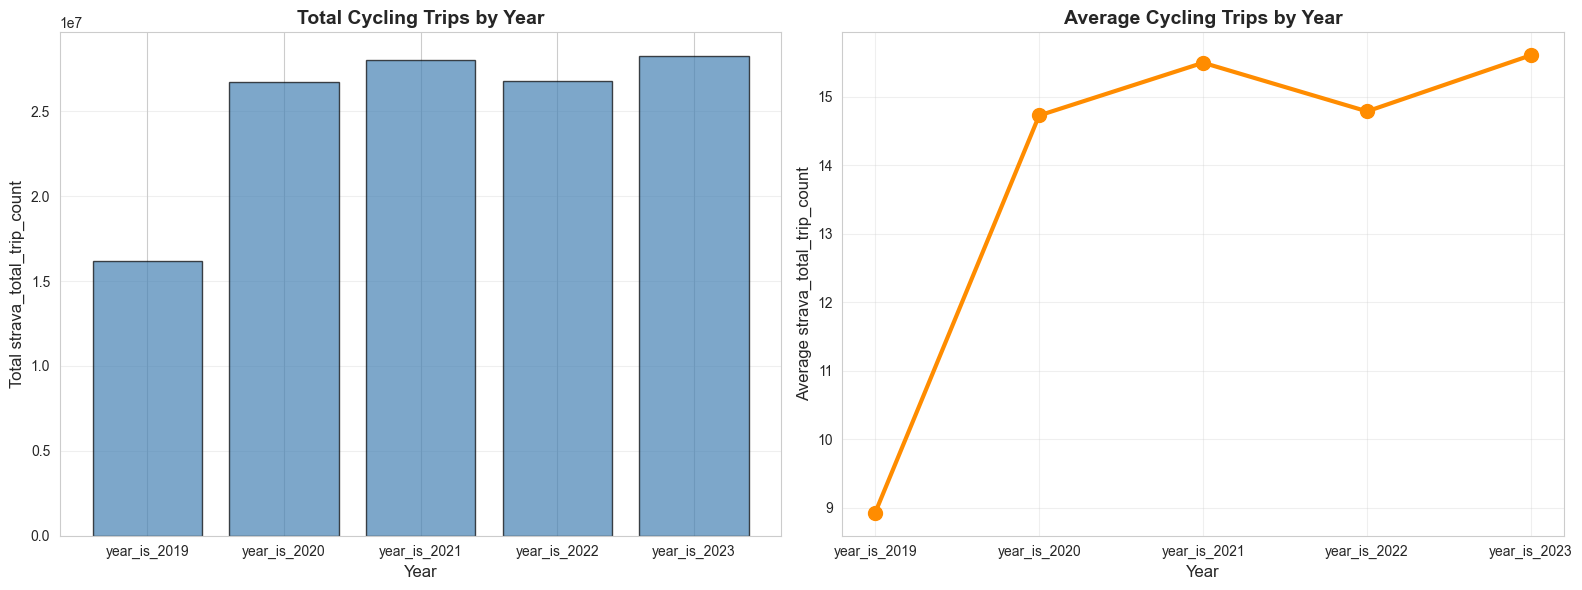


[2/6] Analyzing monthly patterns...

Monthly statistics:
                     sum   mean    std   count
month                                         
month_is_1   4905245.000  6.380 12.820  768490
month_is_10  9500450.000 12.360 24.470  768490
month_is_11  7480760.000 10.060 19.580  743700
month_is_12  4516985.000  5.880 12.630  768490
month_is_2   5326710.000  7.620 18.480  699078
month_is_3   8539840.000 11.110 23.390  768490
month_is_4  11127900.000 14.960 30.840  743700
month_is_5  14921210.000 19.420 39.560  768490
month_is_6  17832880.000 23.980 49.270  743700
month_is_7  14328950.000 18.650 51.350  768490
month_is_8  14296310.000 18.600 34.860  768490
month_is_9  13188140.000 17.730 33.200  743700

Monthly statistics:
                     sum   mean    std   count
month                                         
month_is_1   4905245.000  6.380 12.820  768490
month_is_10  9500450.000 12.360 24.470  768490
month_is_11  7480760.000 10.060 19.580  743700
month_is_12  4516985.000  5.

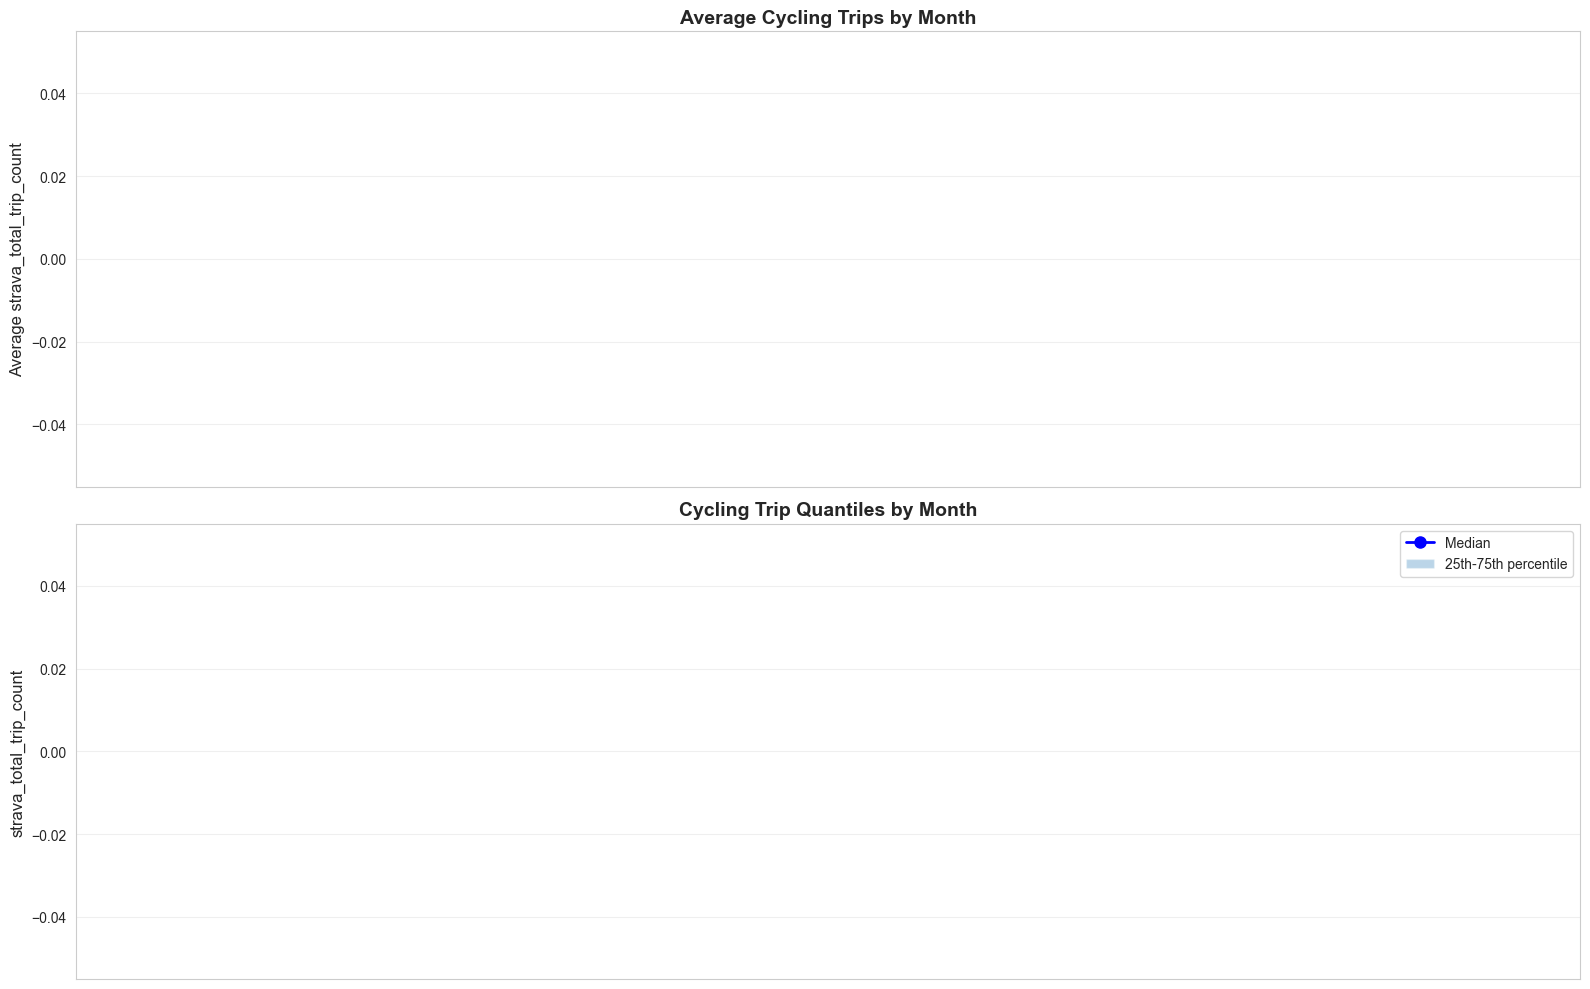


[3/6] Analyzing day of week patterns...

Day of week statistics:
                     sum   mean    std    count
day_of_week                                    
Friday      15961420.000 12.330 24.910  1294038
Monday      16846700.000 13.070 25.870  1289080
Saturday    15542150.000 12.010 29.650  1294038
Sunday      20288980.000 15.680 49.320  1294038
Thursday    18136965.000 14.020 28.370  1294038
Tuesday     19582635.000 15.130 30.600  1294038
Wednesday   19606530.000 15.150 30.590  1294038

Day of week statistics:
                     sum   mean    std    count
day_of_week                                    
Friday      15961420.000 12.330 24.910  1294038
Monday      16846700.000 13.070 25.870  1289080
Saturday    15542150.000 12.010 29.650  1294038
Sunday      20288980.000 15.680 49.320  1294038
Thursday    18136965.000 14.020 28.370  1294038
Tuesday     19582635.000 15.130 30.600  1294038
Wednesday   19606530.000 15.150 30.590  1294038


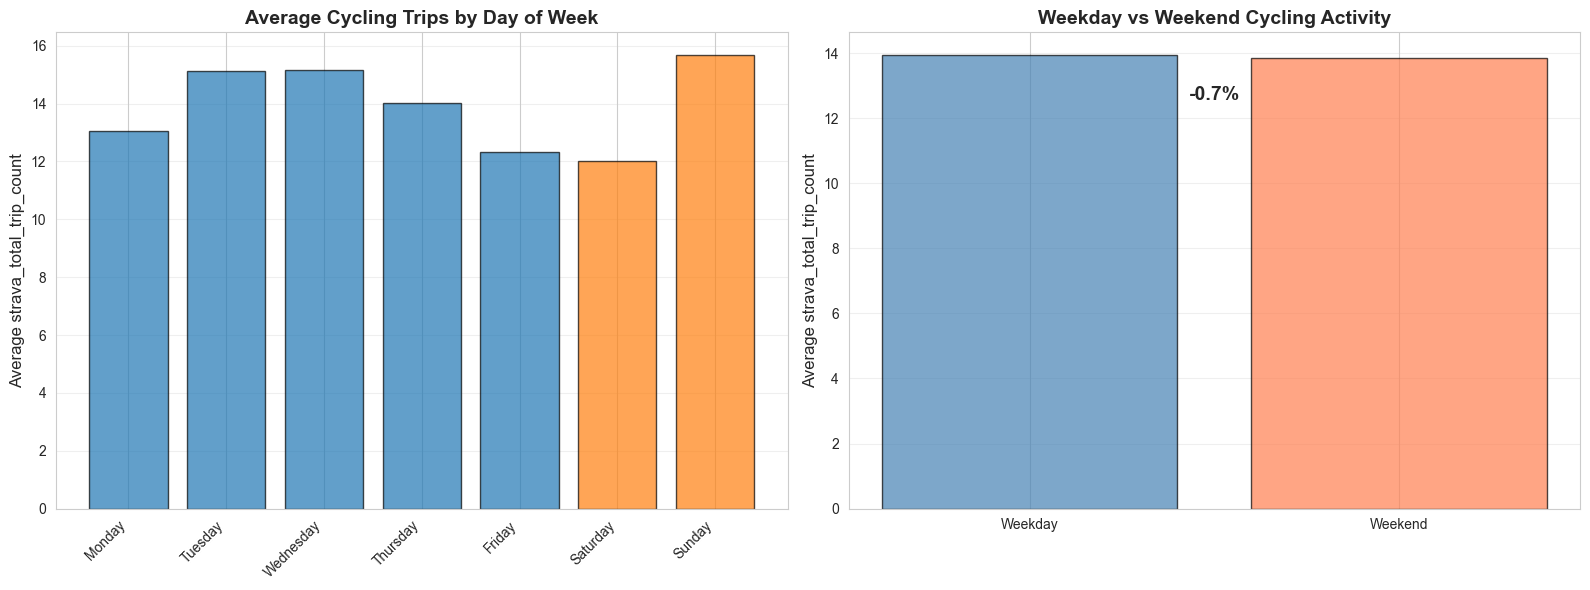


[4/6] Analyzing holiday effects...


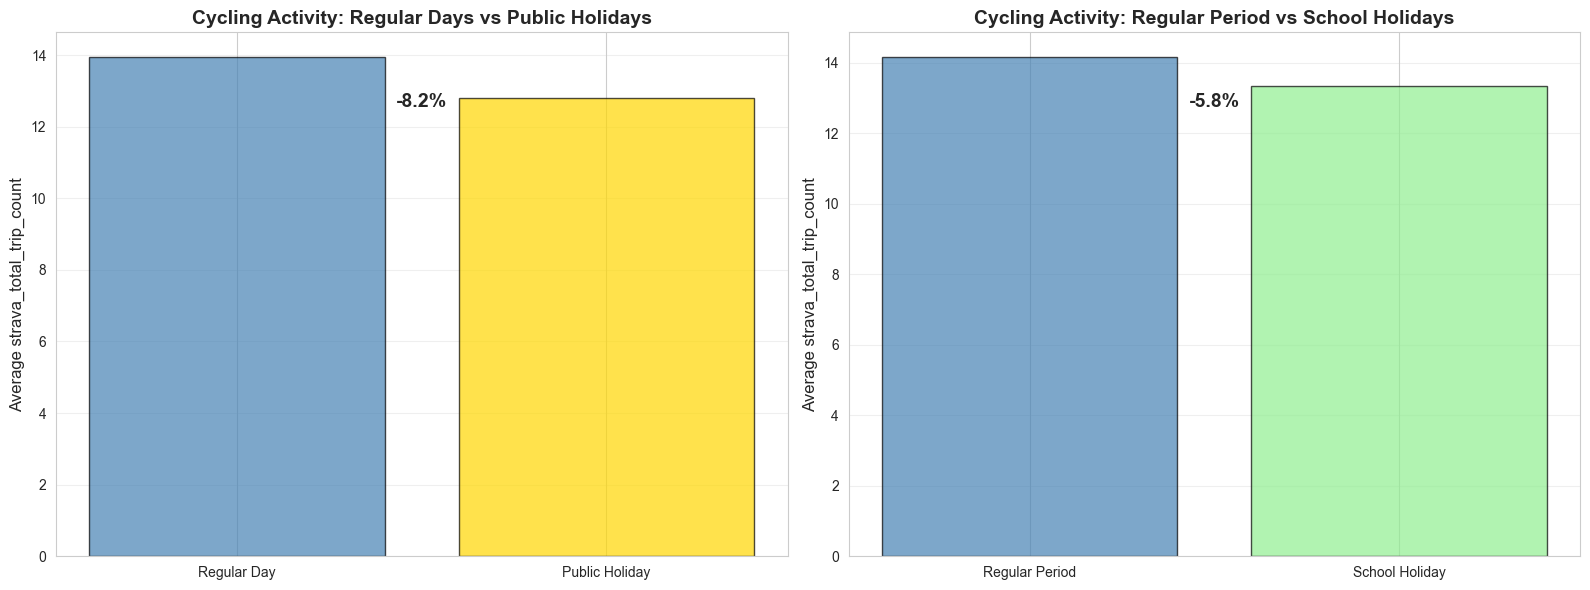


Holiday effects summary:
  Public holidays vs regular days: -8.2% difference
  School holidays vs regular period: -5.8% difference

[5/6] Analyzing time of day patterns...


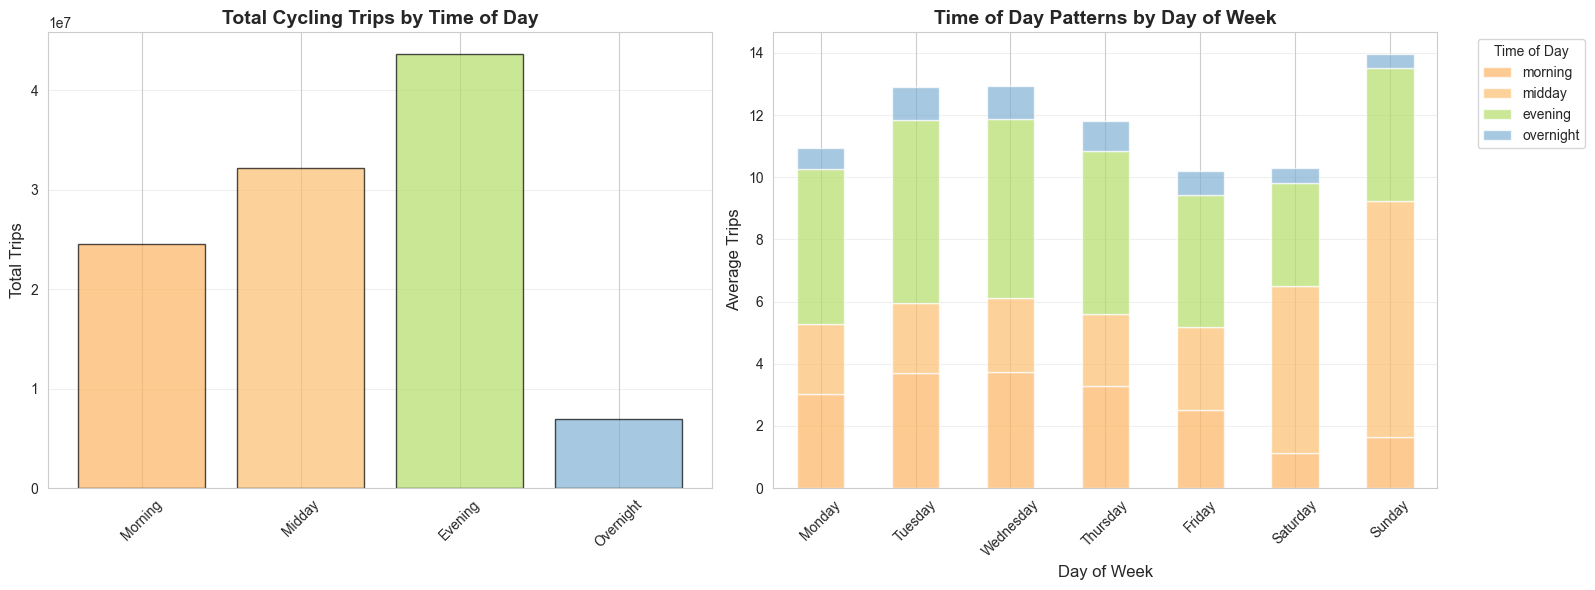


[6/6] Analyzing weather seasonality...


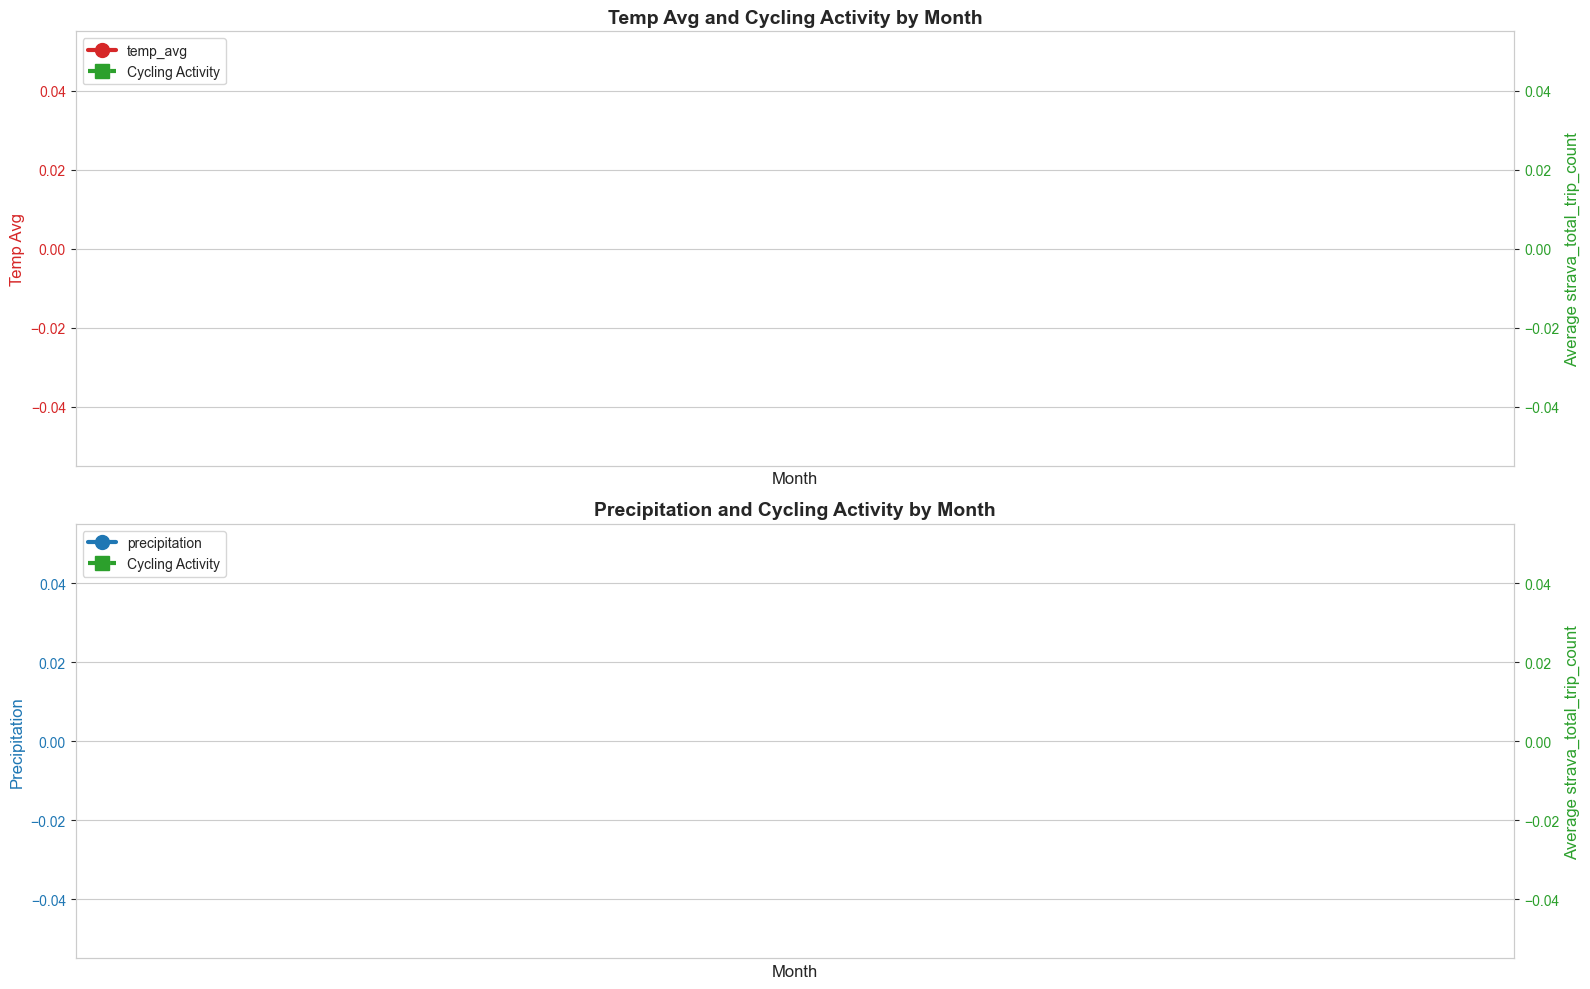


TEMPORAL ANALYSIS COMPLETE


In [13]:
print("=" * 80)
print("STRAVA BERLIN DATA - TEMPORAL ANALYSIS")
print("=" * 80)

categorical_features = [f for f in features['categorical'] if f in df.columns]

# ==============================================================================
# 1. YEARLY TRENDS
# ==============================================================================

print("\n[1/6] Analyzing yearly trends...")

if 'year' in categorical_features:
    yearly_stats = df.groupby('year')[target].agg(['sum', 'mean', 'count']).round(2)
    print("\nYearly statistics:")
    print(yearly_stats)
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Total trips per year
    yearly_sum = yearly_stats['sum']
    axes[0].bar(yearly_sum.index.astype(str), yearly_sum.values, color='steelblue', alpha=0.7, edgecolor='black')
    axes[0].set_xlabel('Year', fontsize=12)
    axes[0].set_ylabel(f'Total {target}', fontsize=12)
    axes[0].set_title('Total Cycling Trips by Year', fontsize=14, fontweight='bold')
    axes[0].grid(axis='y', alpha=0.3)
    
    # Average trips per year
    yearly_mean = yearly_stats['mean']
    axes[1].plot(yearly_mean.index.astype(str), yearly_mean.values, marker='o', 
                 linewidth=3, markersize=10, color='darkorange')
    axes[1].set_xlabel('Year', fontsize=12)
    axes[1].set_ylabel(f'Average {target}', fontsize=12)
    axes[1].set_title('Average Cycling Trips by Year', fontsize=14, fontweight='bold')
    axes[1].grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# ==============================================================================
# 2. MONTHLY PATTERNS
# ==============================================================================

print("\n[2/6] Analyzing monthly patterns...")

if 'month' in categorical_features:
    monthly_stats = df.groupby('month')[target].agg(['sum', 'mean', 'std', 'count']).round(2)
    print("\nMonthly statistics:")
    print(monthly_stats)
    
    # Define month order
    month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
                   'July', 'August', 'September', 'October', 'November', 'December']
    
    # Filter to only months that exist in the data
    month_order_filtered = [m for m in month_order if m in df['month'].unique()]
    
    fig, axes = plt.subplots(2, 1, figsize=(16, 10))
    
    # Average trips by month
    monthly_mean = monthly_stats['mean'].reindex(month_order_filtered)
    axes[0].bar(range(len(monthly_mean)), monthly_mean.values, color='forestgreen', alpha=0.7, edgecolor='black')
    axes[0].set_xticks(range(len(monthly_mean)))
    axes[0].set_xticklabels(monthly_mean.index, rotation=45, ha='right')
    axes[0].set_ylabel(f'Average {target}', fontsize=12)
    axes[0].set_title('Average Cycling Trips by Month', fontsize=14, fontweight='bold')
    axes[0].grid(axis='y', alpha=0.3)
    
    # Simplified visualization instead of box plot
    # Use quantiles to avoid memory issues
    monthly_quantiles = df.groupby('month')[target].quantile([0.25, 0.5, 0.75]).unstack()
    monthly_quantiles = monthly_quantiles.reindex(month_order_filtered)
    
    x_pos = range(len(month_order_filtered))
    axes[1].plot(x_pos, monthly_quantiles[0.5], marker='o', linewidth=2, markersize=8, label='Median', color='blue')
    axes[1].fill_between(x_pos, monthly_quantiles[0.25], monthly_quantiles[0.75], alpha=0.3, label='25th-75th percentile')
    axes[1].set_xticks(x_pos)
    axes[1].set_xticklabels(month_order_filtered, rotation=45, ha='right')
    axes[1].set_ylabel(target, fontsize=12)
    axes[1].set_title('Cycling Trip Quantiles by Month', fontsize=14, fontweight='bold')
    axes[1].legend()
    axes[1].grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# ==============================================================================
# 3. DAY OF WEEK PATTERNS
# ==============================================================================

print("\n[3/6] Analyzing day of week patterns...")

if 'day_of_week' in categorical_features:
    dow_stats = df.groupby('day_of_week')[target].agg(['sum', 'mean', 'std', 'count']).round(2)
    print("\nDay of week statistics:")
    print(dow_stats)
    
    # Define day order
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    day_order_filtered = [d for d in day_order if d in df['day_of_week'].unique()]
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Average trips by day of week
    dow_mean = dow_stats['mean'].reindex(day_order_filtered)
    colors = ['#1f77b4']*5 + ['#ff7f0e']*2  # Different colors for weekdays vs weekend
    axes[0].bar(range(len(dow_mean)), dow_mean.values, color=colors[:len(dow_mean)], alpha=0.7, edgecolor='black')
    axes[0].set_xticks(range(len(dow_mean)))
    axes[0].set_xticklabels(dow_mean.index, rotation=45, ha='right')
    axes[0].set_ylabel(f'Average {target}', fontsize=12)
    axes[0].set_title('Average Cycling Trips by Day of Week', fontsize=14, fontweight='bold')
    axes[0].grid(axis='y', alpha=0.3)
    
    # Weekday vs Weekend comparison
    if 'is_weekend' in df.columns:
        weekend_comparison = df.groupby('is_weekend')[target].mean()
        labels = ['Weekday', 'Weekend']
        axes[1].bar(labels, weekend_comparison.values, color=['steelblue', 'coral'], alpha=0.7, edgecolor='black')
        axes[1].set_ylabel(f'Average {target}', fontsize=12)
        axes[1].set_title('Weekday vs Weekend Cycling Activity', fontsize=14, fontweight='bold')
        axes[1].grid(axis='y', alpha=0.3)
        
        # Add percentage difference
        pct_diff = ((weekend_comparison.iloc[1] - weekend_comparison.iloc[0]) / weekend_comparison.iloc[0] * 100)
        axes[1].text(0.5, max(weekend_comparison.values) * 0.9, 
                    f'{pct_diff:+.1f}%', ha='center', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()

# ==============================================================================
# 4. HOLIDAY EFFECTS
# ==============================================================================

print("\n[4/6] Analyzing holiday effects...")

binary_features = [f for f in features['binary'] if f in df.columns]

if 'is_publicholiday' in binary_features or 'is_schoolholiday' in binary_features:
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Public holidays
    if 'is_publicholiday' in binary_features:
        holiday_comparison = df.groupby('is_publicholiday')[target].mean()
        labels = ['Regular Day', 'Public Holiday']
        axes[0].bar(labels, holiday_comparison.values, color=['steelblue', 'gold'], alpha=0.7, edgecolor='black')
        axes[0].set_ylabel(f'Average {target}', fontsize=12)
        axes[0].set_title('Cycling Activity: Regular Days vs Public Holidays', fontsize=14, fontweight='bold')
        axes[0].grid(axis='y', alpha=0.3)
        
        pct_diff = ((holiday_comparison.iloc[1] - holiday_comparison.iloc[0]) / holiday_comparison.iloc[0] * 100)
        axes[0].text(0.5, max(holiday_comparison.values) * 0.9, 
                    f'{pct_diff:+.1f}%', ha='center', fontsize=14, fontweight='bold')
    
    # School holidays
    if 'is_schoolholiday' in binary_features:
        school_holiday_comparison = df.groupby('is_schoolholiday')[target].mean()
        labels = ['Regular Period', 'School Holiday']
        axes[1].bar(labels, school_holiday_comparison.values, color=['steelblue', 'lightgreen'], 
                   alpha=0.7, edgecolor='black')
        axes[1].set_ylabel(f'Average {target}', fontsize=12)
        axes[1].set_title('Cycling Activity: Regular Period vs School Holidays', fontsize=14, fontweight='bold')
        axes[1].grid(axis='y', alpha=0.3)
        
        pct_diff_school = ((school_holiday_comparison.iloc[1] - school_holiday_comparison.iloc[0]) / 
                          school_holiday_comparison.iloc[0] * 100)
        axes[1].text(0.5, max(school_holiday_comparison.values) * 0.9, 
                    f'{pct_diff_school:+.1f}%', ha='center', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    print("\nHoliday effects summary:")
    if 'is_publicholiday' in binary_features:
        print(f"  Public holidays vs regular days: {pct_diff:+.1f}% difference")
    if 'is_schoolholiday' in binary_features:
        print(f"  School holidays vs regular period: {pct_diff_school:+.1f}% difference")

# ==============================================================================
# 5. TIME OF DAY PATTERNS
# ==============================================================================

print("\n[5/6] Analyzing time of day patterns...")

time_features = [
    'strava_total_morning_trip_count',
    'strava_total_midday_trip_count',
    'strava_total_evening_trip_count',
    'strava_total_overnight_trip_count'
]
time_features = [f for f in time_features if f in df.columns]

if time_features:
    # Overall time of day distribution - use aggregated sums instead of individual rows
    time_totals = [df[f].sum() for f in time_features]
    labels = [f.replace('strava_total_', '').replace('_trip_count', '').title() for f in time_features]
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Bar chart
    axes[0].bar(labels, time_totals, color=['#FDB462', '#FDBF6F', '#B3DE69', '#80B1D3'], 
               alpha=0.7, edgecolor='black')
    axes[0].set_ylabel('Total Trips', fontsize=12)
    axes[0].set_title('Total Cycling Trips by Time of Day', fontsize=14, fontweight='bold')
    axes[0].grid(axis='y', alpha=0.3)
    axes[0].tick_params(axis='x', rotation=45)
    
    # Time of day by day of week - use aggregated data
    if 'day_of_week' in categorical_features:
        day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
        day_order_filtered = [d for d in day_order if d in df['day_of_week'].unique()]
        
        # Aggregate data first
        time_by_dow_data = []
        for time_feature in time_features:
            time_label = time_feature.replace('strava_total_', '').replace('_trip_count', '')
            means = df.groupby('day_of_week')[time_feature].mean()
            time_by_dow_data.append(means.reindex(day_order_filtered))
        
        time_by_dow = pd.DataFrame(time_by_dow_data, 
                                   index=[f.replace('strava_total_', '').replace('_trip_count', '') for f in time_features],
                                   columns=day_order_filtered).T
        
        time_by_dow.plot(kind='bar', stacked=True, ax=axes[1], 
                        color=['#FDB462', '#FDBF6F', '#B3DE69', '#80B1D3'], alpha=0.7)
        axes[1].set_xlabel('Day of Week', fontsize=12)
        axes[1].set_ylabel('Average Trips', fontsize=12)
        axes[1].set_title('Time of Day Patterns by Day of Week', fontsize=14, fontweight='bold')
        axes[1].legend(title='Time of Day', bbox_to_anchor=(1.05, 1), loc='upper left')
        axes[1].grid(axis='y', alpha=0.3)
        axes[1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

# ==============================================================================
# 6. WEATHER SEASONALITY
# ==============================================================================

print("\n[6/6] Analyzing weather seasonality...")

weather_features = [f for f in features['numerical'] if f.startswith('weather_') and f in df.columns]
key_weather = ['weather_temp_avg', 'weather_precipitation', 'weather_sunshine_duration']
key_weather = [f for f in key_weather if f in weather_features]

if key_weather and 'month' in categorical_features:
    month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
                   'July', 'August', 'September', 'October', 'November', 'December']
    month_order_filtered = [m for m in month_order if m in df['month'].unique()]
    
    # Process only first 2 weather features to save memory
    n_features = min(2, len(key_weather))
    fig, axes = plt.subplots(n_features, 1, figsize=(16, 5*n_features))
    if n_features == 1:
        axes = [axes]
    
    for idx, weather_feature in enumerate(key_weather[:n_features]):
        # Aggregate data first
        monthly_weather = df.groupby('month')[weather_feature].mean()
        monthly_weather = monthly_weather.reindex(month_order_filtered)
        
        monthly_cycling = df.groupby('month')[target].mean()
        monthly_cycling = monthly_cycling.reindex(month_order_filtered)
        
        # Primary axis - weather metric
        ax1 = axes[idx]
        color = 'tab:red' if 'temp' in weather_feature else 'tab:blue'
        ax1.plot(range(len(monthly_weather)), monthly_weather.values, 
                color=color, marker='o', linewidth=3, markersize=10, label=weather_feature.replace('weather_', ''))
        ax1.set_xlabel('Month', fontsize=12)
        ax1.set_ylabel(weather_feature.replace('weather_', '').replace('_', ' ').title(), 
                      fontsize=12, color=color)
        ax1.tick_params(axis='y', labelcolor=color)
        ax1.set_xticks(range(len(monthly_weather)))
        ax1.set_xticklabels(monthly_weather.index, rotation=45, ha='right')
        ax1.grid(alpha=0.3)
        
        # Secondary axis - cycling activity
        ax2 = ax1.twinx()
        color = 'tab:green'
        ax2.plot(range(len(monthly_cycling)), monthly_cycling.values, 
                color=color, marker='s', linewidth=3, markersize=10, 
                linestyle='--', label='Cycling Activity')
        ax2.set_ylabel(f'Average {target}', fontsize=12, color=color)
        ax2.tick_params(axis='y', labelcolor=color)
        
        # Title
        axes[idx].set_title(f'{weather_feature.replace("weather_", "").replace("_", " ").title()} and Cycling Activity by Month', 
                           fontsize=14, fontweight='bold')
        
        # Legends
        lines1, labels1 = ax1.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
    
    plt.tight_layout()
    plt.show()

print("\n" + "=" * 80)
print("TEMPORAL ANALYSIS COMPLETE")
print("=" * 80)

# Step 5: Spatial Analysis - Geographic Patterns and Trends

STRAVA BERLIN DATA - SPATIAL ANALYSIS

[1/6] Analyzing geographic distribution of cycling activity...


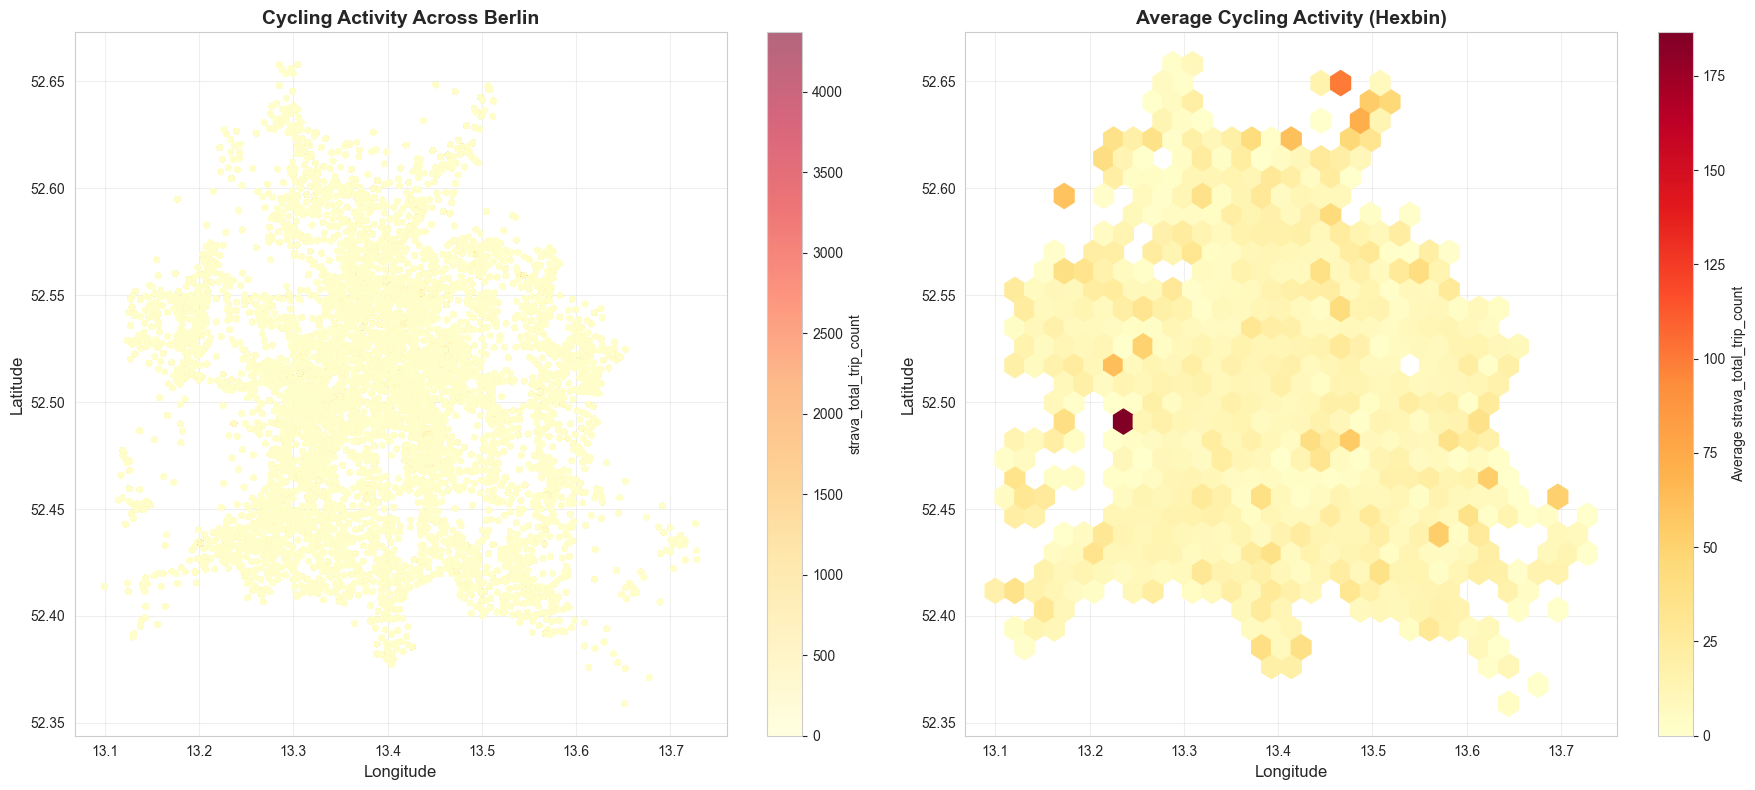


Geographic statistics:
  Latitude range: 52.3590 to 52.6579
  Longitude range: 13.0997 to 13.7280
  Number of unique locations: 4958

[2/6] Analyzing distance from city center effects...
  Number of unique locations: 4958

[2/6] Analyzing distance from city center effects...

Statistics by distance from city center:
              strava_total_trip_count                        \
                                 mean          sum    count   
distance_band                                                 
0-2km                          33.930  9975025.000   293986   
2-4km                          24.900 25508160.000  1024386   
4-6km                          17.940 25062365.000  1396890   
6-8km                          12.920 16211935.000  1254462   
8-10km                         13.070 16653870.000  1274548   
10-15km                         8.150 23625265.000  2897862   
15-20km                         8.640  6911035.000   799788   
20+km                          18.110  2017725.000 

: 

In [14]:
print("=" * 80)
print("STRAVA BERLIN DATA - SPATIAL ANALYSIS")
print("=" * 80)

# ==============================================================================
# 1. GEOGRAPHIC DISTRIBUTION OF CYCLING ACTIVITY
# ==============================================================================

print("\n[1/6] Analyzing geographic distribution of cycling activity...")

if 'latitude' in df.columns and 'longitude' in df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(18, 8))
    
    # Scatter plot colored by target
    scatter = axes[0].scatter(df['longitude'], df['latitude'], 
                             c=df[target], cmap='YlOrRd', 
                             s=20, alpha=0.6, edgecolors='none')
    axes[0].set_xlabel('Longitude', fontsize=12)
    axes[0].set_ylabel('Latitude', fontsize=12)
    axes[0].set_title('Cycling Activity Across Berlin', fontsize=14, fontweight='bold')
    plt.colorbar(scatter, ax=axes[0], label=target)
    axes[0].grid(alpha=0.3)
    
    # Hexbin density plot
    hexbin = axes[1].hexbin(df['longitude'], df['latitude'], 
                           C=df[target], gridsize=30, 
                           cmap='YlOrRd', reduce_C_function=np.mean)
    axes[1].set_xlabel('Longitude', fontsize=12)
    axes[1].set_ylabel('Latitude', fontsize=12)
    axes[1].set_title('Average Cycling Activity (Hexbin)', fontsize=14, fontweight='bold')
    plt.colorbar(hexbin, ax=axes[1], label=f'Average {target}')
    axes[1].grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Statistics by location
    print("\nGeographic statistics:")
    print(f"  Latitude range: {df['latitude'].min():.4f} to {df['latitude'].max():.4f}")
    print(f"  Longitude range: {df['longitude'].min():.4f} to {df['longitude'].max():.4f}")
    print(f"  Number of unique locations: {df[['latitude', 'longitude']].drop_duplicates().shape[0]}")

# ==============================================================================
# 2. DISTANCE FROM CITY CENTER ANALYSIS
# ==============================================================================

print("\n[2/6] Analyzing distance from city center effects...")

if 'infrastructure_distance_citycenter_km' in df.columns:
    # Create distance bands
    distance_bins = [0, 2, 4, 6, 8, 10, 15, 20, 100]
    df['distance_band'] = pd.cut(df['infrastructure_distance_citycenter_km'], 
                                  bins=distance_bins, 
                                  labels=['0-2km', '2-4km', '4-6km', '6-8km', '8-10km', '10-15km', '15-20km', '20+km'])
    
    distance_stats = df.groupby('distance_band', observed=True).agg({
        target: ['mean', 'sum', 'count'],
        'strava_total_people_count': 'mean' if 'strava_total_people_count' in df.columns else 'count'
    }).round(2)
    
    print("\nStatistics by distance from city center:")
    print(distance_stats)
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # Average cycling activity by distance band
    distance_avg = df.groupby('distance_band', observed=True)[target].mean()
    axes[0, 0].bar(range(len(distance_avg)), distance_avg.values, 
                   color='steelblue', alpha=0.7, edgecolor='black')
    axes[0, 0].set_xticks(range(len(distance_avg)))
    axes[0, 0].set_xticklabels(distance_avg.index, rotation=45, ha='right')
    axes[0, 0].set_ylabel(f'Average {target}', fontsize=11)
    axes[0, 0].set_title('Average Cycling Activity by Distance from Center', fontsize=12, fontweight='bold')
    axes[0, 0].grid(axis='y', alpha=0.3)
    
    # Total cycling activity by distance band
    distance_sum = df.groupby('distance_band', observed=True)[target].sum()
    axes[0, 1].bar(range(len(distance_sum)), distance_sum.values, 
                   color='coral', alpha=0.7, edgecolor='black')
    axes[0, 1].set_xticks(range(len(distance_sum)))
    axes[0, 1].set_xticklabels(distance_sum.index, rotation=45, ha='right')
    axes[0, 1].set_ylabel(f'Total {target}', fontsize=11)
    axes[0, 1].set_title('Total Cycling Activity by Distance from Center', fontsize=12, fontweight='bold')
    axes[0, 1].grid(axis='y', alpha=0.3)
    
    # Scatter plot with trend line
    axes[1, 0].scatter(df['infrastructure_distance_citycenter_km'], df[target], 
                      alpha=0.3, s=10, color='navy')
    
    # Add rolling average
    df_sorted = df.sort_values('infrastructure_distance_citycenter_km')
    rolling_avg = df_sorted.set_index('infrastructure_distance_citycenter_km')[target].rolling(window=100, min_periods=1).mean()
    axes[1, 0].plot(rolling_avg.index, rolling_avg.values, color='red', linewidth=3, label='Rolling Average')
    
    axes[1, 0].set_xlabel('Distance from City Center (km)', fontsize=11)
    axes[1, 0].set_ylabel(target, fontsize=11)
    axes[1, 0].set_title('Cycling Activity vs Distance (with Rolling Average)', fontsize=12, fontweight='bold')
    axes[1, 0].legend()
    axes[1, 0].grid(alpha=0.3)
    
    # 2D histogram
    axes[1, 1].hist2d(df['infrastructure_distance_citycenter_km'], df[target], 
                      bins=40, cmap='YlOrRd', cmin=1)
    axes[1, 1].set_xlabel('Distance from City Center (km)', fontsize=11)
    axes[1, 1].set_ylabel(target, fontsize=11)
    axes[1, 1].set_title('2D Density: Distance vs Cycling Activity', fontsize=12, fontweight='bold')
    
    plt.tight_layout()
    plt.show()

# ==============================================================================
# 3. LAND USE PATTERNS
# ==============================================================================

print("\n[3/6] Analyzing land use patterns...")

land_use_features = [
    'infrastructure_residential_use_percent',
    'infrastructure_commercial_area_percent',
    'infrastructure_park_area_percent',
    'infrastructure_forest_area_percent',
    'infrastructure_traffic_area_percent',
    'infrastructure_grassland_percent'
]
land_use_features = [f for f in land_use_features if f in df.columns]

if land_use_features:
    # Create land use categories based on dominant type
    df['dominant_land_use'] = df[land_use_features].idxmax(axis=1)
    df['dominant_land_use'] = df['dominant_land_use'].str.replace('infrastructure_', '').str.replace('_percent', '')
    
    landuse_stats = df.groupby('dominant_land_use')[target].agg(['mean', 'count', 'sum']).sort_values('mean', ascending=False)
    
    print("\nCycling activity by dominant land use:")
    print(landuse_stats)
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # Average cycling by land use type
    axes[0, 0].barh(range(len(landuse_stats)), landuse_stats['mean'].values, color='forestgreen', alpha=0.7)
    axes[0, 0].set_yticks(range(len(landuse_stats)))
    axes[0, 0].set_yticklabels(landuse_stats.index)
    axes[0, 0].set_xlabel(f'Average {target}', fontsize=11)
    axes[0, 0].set_title('Average Cycling Activity by Dominant Land Use', fontsize=12, fontweight='bold')
    axes[0, 0].grid(axis='x', alpha=0.3)
    
    # Distribution of land use types
    landuse_counts = df['dominant_land_use'].value_counts()
    axes[0, 1].pie(landuse_counts.values, labels=landuse_counts.index, autopct='%1.1f%%', startangle=90)
    axes[0, 1].set_title('Distribution of Dominant Land Use Types', fontsize=12, fontweight='bold')
    
    # Box plots by land use
    land_use_data = [df[df['dominant_land_use'] == lu][target].values for lu in landuse_stats.index]
    bp = axes[1, 0].boxplot(land_use_data, labels=landuse_stats.index, patch_artist=True)
    for patch in bp['boxes']:
        patch.set_facecolor('lightblue')
        patch.set_alpha(0.7)
    axes[1, 0].set_xticklabels(landuse_stats.index, rotation=45, ha='right')
    axes[1, 0].set_ylabel(target, fontsize=11)
    axes[1, 0].set_title('Cycling Activity Distribution by Land Use', fontsize=12, fontweight='bold')
    axes[1, 0].grid(axis='y', alpha=0.3)
    
    # Specific land use percentages vs cycling
    if 'infrastructure_park_area_percent' in land_use_features:
        axes[1, 1].scatter(df['infrastructure_park_area_percent'], df[target], 
                          alpha=0.3, s=10, color='green')
        axes[1, 1].set_xlabel('Park Area Percentage', fontsize=11)
        axes[1, 1].set_ylabel(target, fontsize=11)
        axes[1, 1].set_title('Park Area vs Cycling Activity', fontsize=12, fontweight='bold')
        axes[1, 1].grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# ==============================================================================
# 4. INFRASTRUCTURE DENSITY HOTSPOTS
# ==============================================================================

print("\n[4/6] Analyzing infrastructure density hotspots...")

# Analyze proximity features
proximity_features = [f for f in df.columns if 'count_' in f and 'within' in f and 'infrastructure' in f]

if proximity_features and 'latitude' in df.columns and 'longitude' in df.columns:
    # Select features at 0.25km radius for analysis
    features_025 = [f for f in proximity_features if '0.25km' in f]
    
    if features_025:
        fig, axes = plt.subplots(2, 2, figsize=(16, 14))
        
        for idx, feature in enumerate(features_025[:4]):
            row = idx // 2
            col = idx % 2
            
            scatter = axes[row, col].scatter(df['longitude'], df['latitude'], 
                                            c=df[feature], cmap='viridis', 
                                            s=20, alpha=0.6, edgecolors='none')
            axes[row, col].set_xlabel('Longitude', fontsize=10)
            axes[row, col].set_ylabel('Latitude', fontsize=10)
            title = feature.replace('infrastructure_count_', '').replace('_within0.25km', '')
            axes[row, col].set_title(f'{title.title()} Density', fontsize=11, fontweight='bold')
            plt.colorbar(scatter, ax=axes[row, col], label='Count')
            axes[row, col].grid(alpha=0.3)
        
        plt.tight_layout()
        plt.show()

# ==============================================================================
# 5. CYCLING NETWORK CONNECTIVITY
# ==============================================================================

print("\n[5/6] Analyzing cycling network connectivity...")

connectivity_features = [f for f in df.columns if f.startswith('connectivity_')]

if connectivity_features and 'latitude' in df.columns and 'longitude' in df.columns:
    n_features = min(4, len(connectivity_features))
    fig, axes = plt.subplots(2, 2, figsize=(16, 14))
    axes = axes.flatten()
    
    for idx, feature in enumerate(connectivity_features[:n_features]):
        scatter = axes[idx].scatter(df['longitude'], df['latitude'], 
                                   c=df[feature], cmap='plasma', 
                                   s=20, alpha=0.6, edgecolors='none')
        axes[idx].set_xlabel('Longitude', fontsize=10)
        axes[idx].set_ylabel('Latitude', fontsize=10)
        axes[idx].set_title(feature.replace('connectivity_', '').title(), fontsize=11, fontweight='bold')
        plt.colorbar(scatter, ax=axes[idx], label='Value')
        axes[idx].grid(alpha=0.3)
    
    # Hide unused subplots
    for idx in range(n_features, 4):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Network type comparison
    if 'connectivity_is_cycling_main_network' in df.columns:
        network_comparison = df.groupby('connectivity_is_cycling_main_network')[target].agg(['mean', 'count'])
        print("\nCycling activity by network type:")
        print(network_comparison)

# ==============================================================================
# 6. SPATIAL CLUSTERING OF HIGH ACTIVITY AREAS
# ==============================================================================

print("\n[6/6] Identifying high activity areas...")

if 'latitude' in df.columns and 'longitude' in df.columns:
    # Define high activity threshold (top 25%)
    high_activity_threshold = df[target].quantile(0.75)
    df['is_high_activity'] = df[target] >= high_activity_threshold
    
    print(f"\nHigh activity threshold: {high_activity_threshold:.2f}")
    print(f"Number of high activity locations: {df['is_high_activity'].sum()} ({df['is_high_activity'].sum()/len(df)*100:.1f}%)")
    
    fig, axes = plt.subplots(1, 2, figsize=(18, 8))
    
    # All locations colored by activity level
    colors = ['lightblue' if not ha else 'red' for ha in df['is_high_activity']]
    sizes = [10 if not ha else 30 for ha in df['is_high_activity']]
    alphas = [0.3 if not ha else 0.7 for ha in df['is_high_activity']]
    
    for i in range(len(df)):
        axes[0].scatter(df.iloc[i]['longitude'], df.iloc[i]['latitude'], 
                       c=colors[i], s=sizes[i], alpha=alphas[i], edgecolors='none')
    
    axes[0].set_xlabel('Longitude', fontsize=12)
    axes[0].set_ylabel('Latitude', fontsize=12)
    axes[0].set_title('High Activity Locations (Top 25%)', fontsize=14, fontweight='bold')
    axes[0].grid(alpha=0.3)
    
    # High activity locations only - larger view
    high_activity_df = df[df['is_high_activity']]
    scatter = axes[1].scatter(high_activity_df['longitude'], high_activity_df['latitude'], 
                             c=high_activity_df[target], cmap='Reds', 
                             s=50, alpha=0.7, edgecolors='black', linewidths=0.5)
    axes[1].set_xlabel('Longitude', fontsize=12)
    axes[1].set_ylabel('Latitude', fontsize=12)
    axes[1].set_title('High Activity Hotspots Detail', fontsize=14, fontweight='bold')
    plt.colorbar(scatter, ax=axes[1], label=target)
    axes[1].grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Characteristics of high activity areas
    print("\nCharacteristics of high activity areas vs others:")
    
    comparison_features = [
        'infrastructure_distance_citycenter_km',
        'connectivity_degree',
        'connectivity_betweenness'
    ]
    comparison_features = [f for f in comparison_features if f in df.columns]
    
    if comparison_features:
        comparison = df.groupby('is_high_activity')[comparison_features].mean()
        print(comparison)

print("\n" + "=" * 80)
print("SPATIAL ANALYSIS COMPLETE")
print("=" * 80)